#  Predicción de Cancelación de Reservas de Hotel

## Evaluación Segundo Parcial - Machine Learning

---

###  Objetivo
Desarrollar un modelo de Machine Learning para predecir si una reserva de hotel será cancelada o no antes de la llegada del cliente.

###  Tipo de Problema
**Clasificación Binaria**
- Variable objetivo: `is_canceled`
- Clase 0: No cancelada
- Clase 1: Cancelada

###  Dataset
Hotel Bookings Dataset - Contiene información detallada sobre reservas de hoteles incluyendo características del cliente, fechas, tipo de habitación, precios, etc.

---

##  0. SETUP - Importación de Librerías y Configuración

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Semilla para reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print(" Librerías importadas correctamente")
print(f" Pandas version: {pd.__version__}")
print(f" NumPy version: {np.__version__}")

 Librerías importadas correctamente
 Pandas version: 2.3.3
 NumPy version: 2.3.4


---
##  1. CARGA Y EXPLORACIÓN INICIAL DE DATOS

### 1.1 Carga del Dataset

In [2]:
# Cargar dataset
df = pd.read_csv('hotel_bookings.csv')

print(" Dataset cargado exitosamente")
print(f" Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")

 Dataset cargado exitosamente
 Dimensiones: 119,390 filas × 32 columnas


### 1.2 Vista Preliminar de los Datos

In [3]:
# Primeras filas
print(" Primeras 5 filas del dataset:")
print("="*100)
df.head()

 Primeras 5 filas del dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000,NaN,0,Transient,75.000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000,NaN,0,Transient,98.000,0,1,Check-Out,2015-07-03


In [4]:
# Últimas filas
print(" Últimas 5 filas del dataset:")
print("="*100)
df.tail()

 Últimas 5 filas del dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.000,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.000,NaN,0,Transient,96.140,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.000,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.000,NaN,0,Transient,225.430,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.000,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.000,NaN,0,Transient,157.710,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.000,NaN,0,Transient,104.400,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.000,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.000,NaN,0,Transient,151.200,0,2,Check-Out,2017-09-07


In [5]:
# Muestra aleatoria
print(" Muestra aleatoria de 10 filas:")
print("="*100)
df.sample(10, random_state=RANDOM_STATE)

 Muestra aleatoria de 10 filas:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,Resort Hotel,0,203,2016,December,49,2,2,5,2,0.000,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.000,NaN,0,Transient,66.800,0,0,Check-Out,2016-12-09
40207,City Hotel,1,82,2015,July,29,16,0,3,2,0.000,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.000,NaN,0,Transient,76.500,0,0,Canceled,2015-07-16
103708,City Hotel,0,25,2016,December,53,27,0,3,3,0.000,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.000,NaN,0,Transient-Party,60.000,0,1,Check-Out,2016-12-30
85144,City Hotel,0,1,2016,March,11,9,0,1,1,0.000,0,BB,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.000,NaN,0,Transient-Party,95.000,0,0,Check-Out,2016-03-10
109991,City Hotel,0,70,2017,April,16,16,2,2,2,0.000,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.000,NaN,0,Transient,108.000,0,0,Check-Out,2017-04-20
110622,City Hotel,0,170,2017,April,17,27,0,3,2,0.000,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.000,NaN,0,Transient,130.500,0,0,Check-Out,2017-04-30
47790,City Hotel,1,21,2016,March,10,4,0,1,1,0.000,0,BB,SVN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.000,NaN,0,Transient-Party,85.000,0,0,Canceled,2016-02-26
44992,City Hotel,0,102,2015,October,42,16,0,2,2,0.000,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,6.000,NaN,0,Transient-Party,109.000,0,0,Check-Out,2015-10-18
30528,Resort Hotel,0,55,2016,November,47,19,2,5,2,0.000,0,HB,GBR,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,314.000,NaN,0,Transient,67.440,0,0,Check-Out,2016-11-26
16886,Resort Hotel,0,222,2015,September,38,14,1,1,2,0.000,0,HB,ESP,Groups,TA/TO,0,0,0,A,A,0,No Deposit,68.000,NaN,0,Transient,80.000,0,0,Check-Out,2015-09-16


### 1.3 Información General del Dataset

In [6]:
# Información general
print(" INFORMACIÓN GENERAL DEL DATASET")
print("="*100)
df.info()

 INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-nu

In [7]:
# Resumen de columnas
print("\n RESUMEN DE COLUMNAS")
print("="*100)

column_info = pd.DataFrame({
    'Tipo': df.dtypes,
    'Valores Únicos': df.nunique(),
    'Valores Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
})

column_info


 RESUMEN DE COLUMNAS


,Tipo,Valores Únicos,Valores Nulos,% Nulos
hotel,object,2,0,0.000
is_canceled,int64,2,0,0.000
lead_time,int64,479,0,0.000
arrival_date_year,int64,3,0,0.000
arrival_date_month,object,12,0,0.000
arrival_date_week_number,int64,53,0,0.000
arrival_date_day_of_month,int64,31,0,0.000
stays_in_weekend_nights,int64,17,0,0.000
stays_in_week_nights,int64,35,0,0.000
adults,int64,14,0,0.000


 ANÁLISIS DE LA VARIABLE OBJETIVO: is_canceled

Distribución de clases:
  - No Cancelada (0): 75,166 (62.96%)
  - Cancelada (1):    44,224 (37.04%)


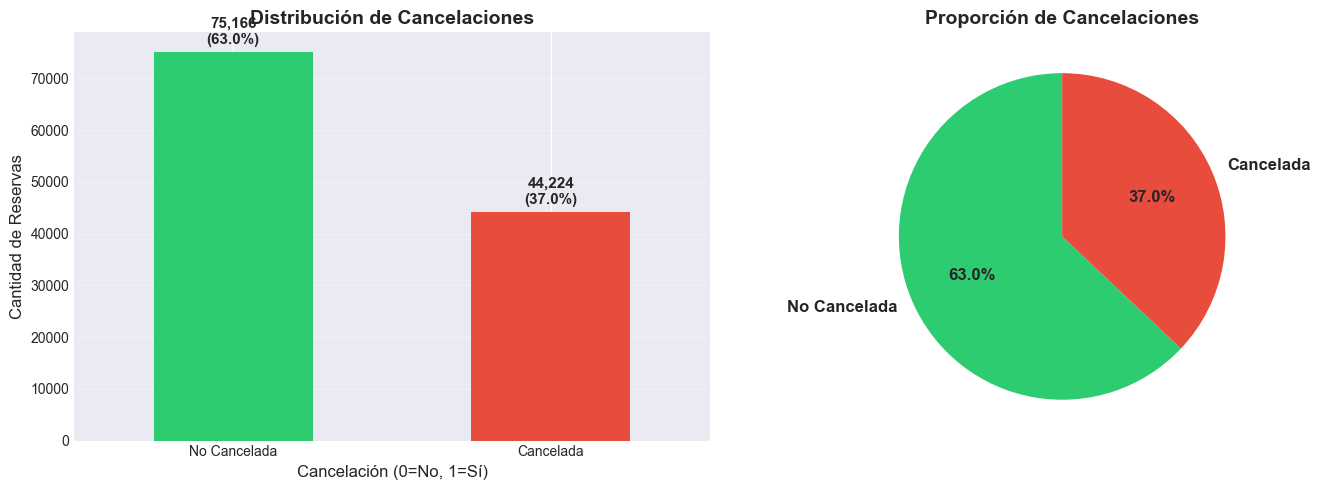


 Ratio de desbalance: 1.70:1
️  El dataset presenta desbalance de clases (considerar técnicas de balanceo)


In [8]:
# Análisis de la variable objetivo
print(" ANÁLISIS DE LA VARIABLE OBJETIVO: is_canceled")
print("="*100)

target_counts = df['is_canceled'].value_counts()
target_pct = df['is_canceled'].value_counts(normalize=True) * 100

print("\nDistribución de clases:")
print(f"  - No Cancelada (0): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"  - Cancelada (1):    {target_counts[1]:,} ({target_pct[1]:.2f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
target_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de Cancelaciones', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cancelación (0=No, 1=Sí)', fontsize=12)
axes[0].set_ylabel('Cantidad de Reservas', fontsize=12)
axes[0].set_xticklabels(['No Cancelada', 'Cancelada'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 1000, f'{v:,}\n({target_pct[i]:.1f}%)', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gráfico de pastel
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(target_counts, labels=['No Cancelada', 'Cancelada'], autopct='%1.1f%%',
           colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporción de Cancelaciones', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis de desbalance
balance_ratio = target_counts.max() / target_counts.min()
print(f"\n Ratio de desbalance: {balance_ratio:.2f}:1")
if balance_ratio > 1.5:
    print("️  El dataset presenta desbalance de clases (considerar técnicas de balanceo)")
else:
    print(" El dataset está relativamente balanceado")

### 1.4 Lista de Variables del Dataset

In [9]:
# Clasificación de variables
print(" CLASIFICACIÓN DE VARIABLES")
print("="*100)

# Variables numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remover la variable objetivo de las numéricas
if 'is_canceled' in numerical_cols:
    numerical_cols.remove('is_canceled')

# Variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n Variables Numéricas ({len(numerical_cols)}):")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i:2d}. {col}")

print(f"\n️  Variables Categóricas ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols, 1):
    print(f"  {i:2d}. {col}")

print(f"\n Variable Objetivo: is_canceled")

 CLASIFICACIÓN DE VARIABLES

 Variables Numéricas (19):
   1. lead_time
   2. arrival_date_year
   3. arrival_date_week_number
   4. arrival_date_day_of_month
   5. stays_in_weekend_nights
   6. stays_in_week_nights
   7. adults
   8. children
   9. babies
  10. is_repeated_guest
  11. previous_cancellations
  12. previous_bookings_not_canceled
  13. booking_changes
  14. agent
  15. company
  16. days_in_waiting_list
  17. adr
  18. required_car_parking_spaces
  19. total_of_special_requests

️  Variables Categóricas (12):
   1. hotel
   2. arrival_date_month
   3. meal
   4. country
   5. market_segment
   6. distribution_channel
   7. reserved_room_type
   8. assigned_room_type
   9. deposit_type
  10. customer_type
  11. reservation_status
  12. reservation_status_date

 Variable Objetivo: is_canceled


---
##  2. ANÁLISIS ESTADÍSTICO DESCRIPTIVO

### 2.1 Estadísticas Descriptivas - Variables Numéricas

In [10]:
# Estadísticas descriptivas de variables numéricas
print(" ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*100)

# Descripción estadística completa
desc_stats = df[numerical_cols].describe().T
desc_stats['rango'] = desc_stats['max'] - desc_stats['min']
desc_stats['varianza'] = df[numerical_cols].var()

# Ordenar por desviación estándar (mayor variabilidad primero)
desc_stats = desc_stats.sort_values('std', ascending=False)

print("\nMétricas estadísticas por variable:")
print("-" * 100)
desc_stats

 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS

Métricas estadísticas por variable:
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,rango,varianza
company,6797.000,189.267,131.655,6.000,62.000,179.000,270.000,543.000,537.000,17333.043
agent,103050.000,86.693,110.775,1.000,9.000,14.000,229.000,535.000,534.000,12271.000
lead_time,119390.000,104.011,106.863,0.000,18.000,69.000,160.000,737.000,737.000,11419.722
adr,119390.000,101.831,50.536,-6.380,69.290,94.575,126.000,5400.000,5406.380,2553.866
days_in_waiting_list,119390.000,2.321,17.595,0.000,0.000,0.000,0.000,391.000,391.000,309.574
arrival_date_week_number,119390.000,27.165,13.605,1.000,16.000,28.000,38.000,53.000,52.000,185.100
arrival_date_day_of_month,119390.000,15.798,8.781,1.000,8.000,16.000,23.000,31.000,30.000,77.103
stays_in_week_nights,119390.000,2.500,1.908,0.000,1.000,2.000,3.000,50.000,50.000,3.642
previous_bookings_not_canceled,119390.000,0.137,1.497,0.000,0.000,0.000,0.000,72.000,72.000,2.242
stays_in_weekend_nights,119390.000,0.928,0.999,0.000,0.000,1.000,2.000,19.000,19.000,0.997


In [11]:
# Análisis detallado de variables clave
print("\n ANÁLISIS DETALLADO DE VARIABLES CLAVE")
print("="*100)

variables_clave = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                   'adults', 'children', 'babies']

for col in variables_clave:
    if col in df.columns:
        print(f"\n {col.upper()}")
        print(f"   Media: {df[col].mean():.2f}")
        print(f"   Mediana: {df[col].median():.2f}")
        print(f"   Moda: {df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'}")
        print(f"   Desv. Estándar: {df[col].std():.2f}")
        print(f"   Rango: [{df[col].min():.2f}, {df[col].max():.2f}]")
        print(f"   Coef. Variación: {(df[col].std() / df[col].mean() * 100):.2f}%" if df[col].mean() != 0 else "   Coef. Variación: N/A")


 ANÁLISIS DETALLADO DE VARIABLES CLAVE

 LEAD_TIME
   Media: 104.01
   Mediana: 69.00
   Moda: 0
   Desv. Estándar: 106.86
   Rango: [0.00, 737.00]
   Coef. Variación: 102.74%

 ADR
   Media: 101.83
   Mediana: 94.58
   Moda: 62.0
   Desv. Estándar: 50.54
   Rango: [-6.38, 5400.00]
   Coef. Variación: 49.63%

 STAYS_IN_WEEKEND_NIGHTS
   Media: 0.93
   Mediana: 1.00
   Moda: 0
   Desv. Estándar: 1.00
   Rango: [0.00, 19.00]
   Coef. Variación: 107.66%

 STAYS_IN_WEEK_NIGHTS
   Media: 2.50
   Mediana: 2.00
   Moda: 2
   Desv. Estándar: 1.91
   Rango: [0.00, 50.00]
   Coef. Variación: 76.32%

 ADULTS
   Media: 1.86
   Mediana: 2.00
   Moda: 2
   Desv. Estándar: 0.58
   Rango: [0.00, 55.00]
   Coef. Variación: 31.20%

 CHILDREN
   Media: 0.10
   Mediana: 0.00
   Moda: 0.0
   Desv. Estándar: 0.40
   Rango: [0.00, 10.00]
   Coef. Variación: 383.64%

 BABIES
   Media: 0.01
   Mediana: 0.00
   Moda: 0
   Desv. Estándar: 0.10
   Rango: [0.00, 10.00]
   Coef. Variación: 1225.81%


### 2.2 Estadísticas Descriptivas - Variables Categóricas

In [12]:
# Estadísticas de variables categóricas
print("️  ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("="*100)

cat_summary = pd.DataFrame({
    'Variable': categorical_cols,
    'Valores Únicos': [df[col].nunique() for col in categorical_cols],
    'Valor Más Frecuente': [df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A' for col in categorical_cols],
    'Frecuencia Máxima': [df[col].value_counts().iloc[0] if len(df[col]) > 0 else 0 for col in categorical_cols],
    'Porcentaje Máximo': [f"{df[col].value_counts(normalize=True).iloc[0] * 100:.2f}%" if len(df[col]) > 0 else "0%" for col in categorical_cols]
})

cat_summary

️  ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS


,Variable,Valores Únicos,Valor Más Frecuente,Frecuencia Máxima,Porcentaje Máximo
0,hotel,2,City Hotel,79330,66.45%
1,arrival_date_month,12,August,13877,11.62%
2,meal,5,BB,92310,77.32%
3,country,177,PRT,48590,40.87%
4,market_segment,8,Online TA,56477,47.30%
5,distribution_channel,5,TA/TO,97870,81.98%
6,reserved_room_type,10,A,85994,72.03%
7,assigned_room_type,12,A,74053,62.03%
8,deposit_type,3,No Deposit,104641,87.65%
9,customer_type,4,Transient,89613,75.06%


In [13]:
# Análisis detallado de variables categóricas clave
print("\n DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS PRINCIPALES")
print("="*100)

vars_cat_importantes = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                        'customer_type', 'deposit_type']

for col in vars_cat_importantes:
    if col in df.columns:
        print(f"\n {col.upper()}")
        value_counts = df[col].value_counts()
        value_pct = df[col].value_counts(normalize=True) * 100
        
        for i, (val, count) in enumerate(value_counts.head(5).items()):
            print(f"   {i+1}. {val}: {count:,} ({value_pct[val]:.2f}%)")
        
        if len(value_counts) > 5:
            print(f"   ... y {len(value_counts) - 5} categorías más")


 DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS PRINCIPALES

 HOTEL
   1. City Hotel: 79,330 (66.45%)
   2. Resort Hotel: 40,060 (33.55%)

 MEAL
   1. BB: 92,310 (77.32%)
   2. HB: 14,463 (12.11%)
   3. SC: 10,650 (8.92%)
   4. Undefined: 1,169 (0.98%)
   5. FB: 798 (0.67%)

 MARKET_SEGMENT
   1. Online TA: 56,477 (47.30%)
   2. Offline TA/TO: 24,219 (20.29%)
   3. Groups: 19,811 (16.59%)
   4. Direct: 12,606 (10.56%)
   5. Corporate: 5,295 (4.44%)
   ... y 3 categorías más

 DISTRIBUTION_CHANNEL
   1. TA/TO: 97,870 (81.98%)
   2. Direct: 14,645 (12.27%)
   3. Corporate: 6,677 (5.59%)
   4. GDS: 193 (0.16%)
   5. Undefined: 5 (0.00%)

 CUSTOMER_TYPE
   1. Transient: 89,613 (75.06%)
   2. Transient-Party: 25,124 (21.04%)
   3. Contract: 4,076 (3.41%)
   4. Group: 577 (0.48%)

 DEPOSIT_TYPE
   1. No Deposit: 104,641 (87.65%)
   2. Non Refund: 14,587 (12.22%)
   3. Refundable: 162 (0.14%)


### 2.3 Análisis de Tipos de Datos y Conversiones

In [14]:
# Revisión de tipos de datos
print(" ANÁLISIS DE TIPOS DE DATOS")
print("="*100)

print("\nTipos de datos actuales:")
print(df.dtypes.value_counts())

print("\n\n Variables relacionadas con fechas:")
date_cols = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 
             'arrival_date_day_of_month', 'reservation_status_date']

for col in date_cols:
    if col in df.columns:
        print(f"  - {col}: {df[col].dtype}")

# Crear una columna de fecha completa para análisis temporal
print("\n\n Creando columna de fecha de llegada completa...")

# Mapeo de meses
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['arrival_date_month_num'] = df['arrival_date_month'].map(month_map)

# Crear fecha de llegada
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' + 
    df['arrival_date_month_num'].astype(str) + '-' + 
    df['arrival_date_day_of_month'].astype(str),
    errors='coerce'
)

print(" Columna 'arrival_date' creada exitosamente")
print(f"   Tipo: {df['arrival_date'].dtype}")
print(f"   Rango: {df['arrival_date'].min()} a {df['arrival_date'].max()}")

# Convertir reservation_status_date a datetime
if 'reservation_status_date' in df.columns:
    df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
    print(f"\n Columna 'reservation_status_date' convertida a datetime")
    print(f"   Rango: {df['reservation_status_date'].min()} a {df['reservation_status_date'].max()}")

 ANÁLISIS DE TIPOS DE DATOS

Tipos de datos actuales:
int64      16
object     12
float64     4
Name: count, dtype: int64


 Variables relacionadas con fechas:
  - arrival_date_year: int64
  - arrival_date_month: object
  - arrival_date_week_number: int64
  - arrival_date_day_of_month: int64
  - reservation_status_date: object


 Creando columna de fecha de llegada completa...
 Columna 'arrival_date' creada exitosamente
   Tipo: datetime64[ns]
   Rango: 2015-07-01 00:00:00 a 2017-08-31 00:00:00

 Columna 'reservation_status_date' convertida a datetime
   Rango: 2014-10-17 00:00:00 a 2017-09-14 00:00:00


In [15]:
# Identificar posibles valores especiales (NULL, 'NULL', etc.)
print("\n\n DETECCIÓN DE VALORES ESPECIALES")
print("="*100)

# Verificar valores 'NULL' como string en columnas categóricas
null_string_counts = {}
for col in categorical_cols:
    if 'NULL' in df[col].values or 'null' in df[col].values.astype(str):
        null_count = (df[col] == 'NULL').sum() + (df[col] == 'null').sum()
        if null_count > 0:
            null_string_counts[col] = null_count

if null_string_counts:
    print("\n️  Columnas con valores 'NULL' como string:")
    for col, count in null_string_counts.items():
        print(f"   - {col}: {count:,} valores 'NULL' ({count/len(df)*100:.2f}%)")
else:
    print("\n No se encontraron valores 'NULL' como string")

# Resumen final
print("\n\n RESUMEN DE TIPOS DE DATOS:")
print(f"   - Variables Numéricas: {len(numerical_cols)}")
print(f"   - Variables Categóricas: {len(categorical_cols)}")
print(f"   - Variables de Fecha: 2 (arrival_date, reservation_status_date)")
print(f"   - Variable Objetivo: 1 (is_canceled)")
print(f"   - Total: {len(df.columns)} columnas")



 DETECCIÓN DE VALORES ESPECIALES

 No se encontraron valores 'NULL' como string


 RESUMEN DE TIPOS DE DATOS:
   - Variables Numéricas: 19
   - Variables Categóricas: 12
   - Variables de Fecha: 2 (arrival_date, reservation_status_date)
   - Variable Objetivo: 1 (is_canceled)
   - Total: 34 columnas


---
##  3. ANÁLISIS DE VALORES FALTANTES

### 3.1 Conteo de Valores Faltantes

In [16]:
# Análisis completo de valores faltantes
print(" ANÁLISIS DE VALORES FALTANTES")
print("="*100)

# Calcular valores faltantes
missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2),
    'Tipo de Dato': df.dtypes
})

# Filtrar solo columnas con valores faltantes
missing_data = missing_data[missing_data['Valores Faltantes'] > 0]
missing_data = missing_data.sort_values('Valores Faltantes', ascending=False).reset_index(drop=True)

if len(missing_data) > 0:
    print(f"\n️  Se encontraron {len(missing_data)} columnas con valores faltantes:\n")
    print(missing_data.to_string(index=False))
    
    print(f"\n\n RESUMEN:")
    print(f"   - Total de valores faltantes: {missing_data['Valores Faltantes'].sum():,}")
    print(f"   - Porcentaje total de datos faltantes: {(missing_data['Valores Faltantes'].sum() / (len(df) * len(df.columns)) * 100):.2f}%")
    print(f"   - Columna con más faltantes: {missing_data.iloc[0]['Columna']} ({missing_data.iloc[0]['Porcentaje (%)']}%)")
else:
    print("\n No se encontraron valores faltantes en el dataset")

 ANÁLISIS DE VALORES FALTANTES

️  Se encontraron 4 columnas con valores faltantes:

 Columna  Valores Faltantes  Porcentaje (%) Tipo de Dato
 company             112593          94.310      float64
   agent              16340          13.690      float64
 country                488           0.410       object
children                  4           0.000      float64


 RESUMEN:
   - Total de valores faltantes: 129,425
   - Porcentaje total de datos faltantes: 3.19%
   - Columna con más faltantes: company (94.31%)


### 3.2 Visualización de Valores Faltantes

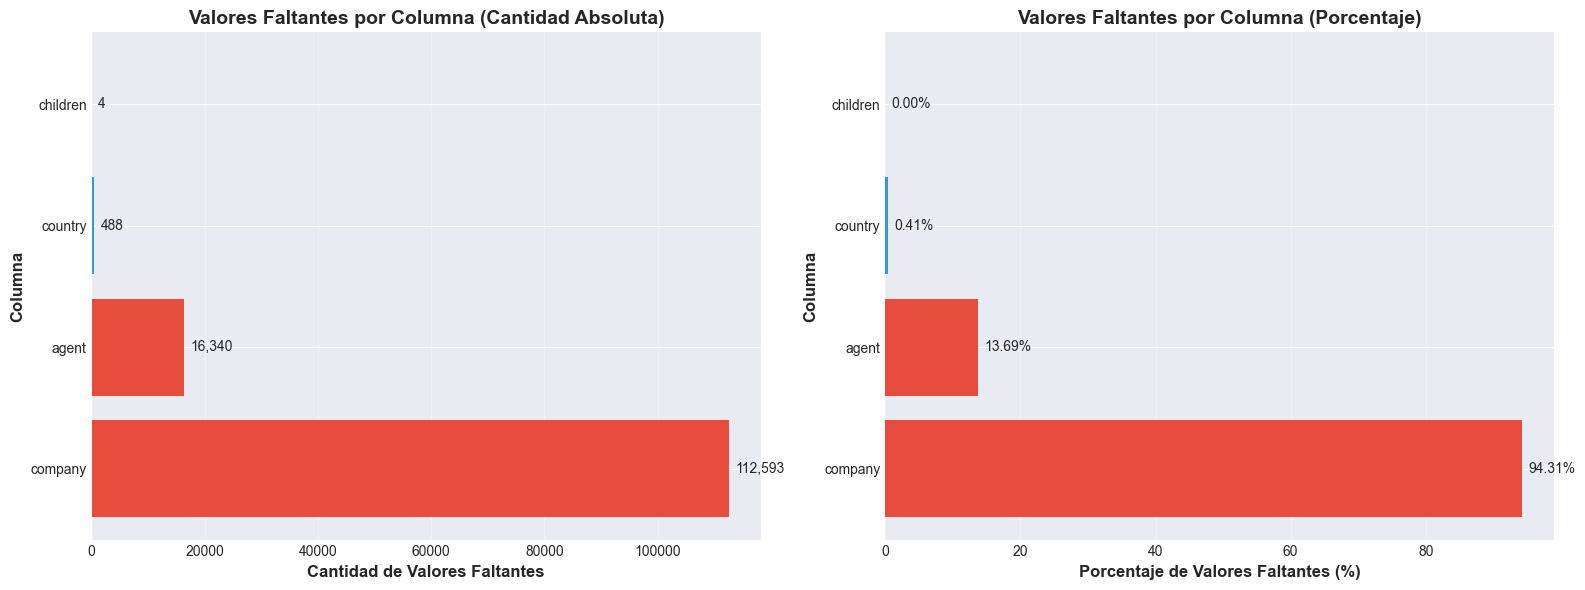

In [17]:
# Gráfico de barras de valores faltantes
if len(missing_data) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Cantidad absoluta de valores faltantes
    ax1 = axes[0]
    colors_bars = ['#e74c3c' if x > len(df)*0.1 else '#f39c12' if x > len(df)*0.05 else '#3498db' 
                   for x in missing_data['Valores Faltantes']]
    
    bars1 = ax1.barh(missing_data['Columna'], missing_data['Valores Faltantes'], color=colors_bars)
    ax1.set_xlabel('Cantidad de Valores Faltantes', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Columna', fontsize=12, fontweight='bold')
    ax1.set_title('Valores Faltantes por Columna (Cantidad Absoluta)', fontsize=14, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Añadir valores en las barras
    for i, (bar, val) in enumerate(zip(bars1, missing_data['Valores Faltantes'])):
        ax1.text(val + max(missing_data['Valores Faltantes'])*0.01, bar.get_y() + bar.get_height()/2, 
                f'{val:,}', va='center', fontsize=10)
    
    # Gráfico 2: Porcentaje de valores faltantes
    ax2 = axes[1]
    bars2 = ax2.barh(missing_data['Columna'], missing_data['Porcentaje (%)'], color=colors_bars)
    ax2.set_xlabel('Porcentaje de Valores Faltantes (%)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Columna', fontsize=12, fontweight='bold')
    ax2.set_title('Valores Faltantes por Columna (Porcentaje)', fontsize=14, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    # Añadir valores en las barras
    for i, (bar, val) in enumerate(zip(bars2, missing_data['Porcentaje (%)'])):
        ax2.text(val + max(missing_data['Porcentaje (%)'])*0.01, bar.get_y() + bar.get_height()/2, 
                f'{val:.2f}%', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print(" No hay valores faltantes para visualizar")


 MAPA DE CALOR DE VALORES FALTANTES


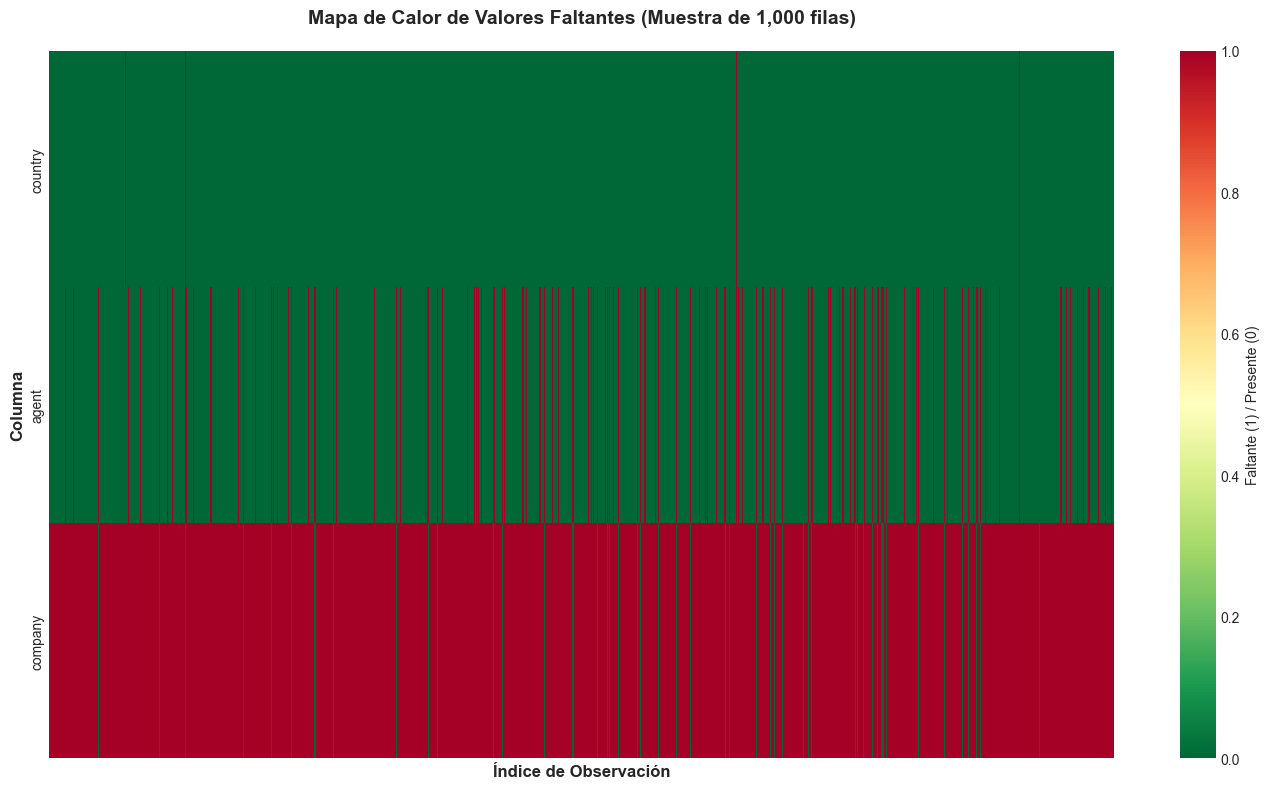


 Interpretación:
   - Rojo: Valores faltantes
   - Verde: Valores presentes
   - Se visualiza una muestra aleatoria de 1,000 observaciones


In [18]:
# Mapa de calor de valores faltantes
print("\n MAPA DE CALOR DE VALORES FALTANTES")
print("="*100)

# Seleccionar una muestra del dataset para mejor visualización
sample_size = min(1000, len(df))
df_sample = df.sample(sample_size, random_state=RANDOM_STATE)

# Crear mapa de calor
fig, ax = plt.subplots(figsize=(14, 8))

# Calcular matriz de valores faltantes (1 = faltante, 0 = presente)
missing_matrix = df_sample.isnull().astype(int)

# Solo mostrar columnas con al menos un valor faltante
cols_with_missing = [col for col in missing_matrix.columns if missing_matrix[col].sum() > 0]

if len(cols_with_missing) > 0:
    sns.heatmap(missing_matrix[cols_with_missing].T, 
                cmap='RdYlGn_r', 
                cbar_kws={'label': 'Faltante (1) / Presente (0)'},
                yticklabels=cols_with_missing,
                xticklabels=False,
                ax=ax)
    
    ax.set_title(f'Mapa de Calor de Valores Faltantes (Muestra de {sample_size:,} filas)', 
                fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Índice de Observación', fontsize=12, fontweight='bold')
    ax.set_ylabel('Columna', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n Interpretación:")
    print(f"   - Rojo: Valores faltantes")
    print(f"   - Verde: Valores presentes")
    print(f"   - Se visualiza una muestra aleatoria de {sample_size:,} observaciones")
else:
    print("\n No hay valores faltantes en la muestra para visualizar")

### 3.3 Análisis del Impacto de Valores Faltantes

In [19]:
# Analizar si los valores faltantes tienen correlación con la variable objetivo
print(" IMPACTO DE VALORES FALTANTES EN LA VARIABLE OBJETIVO")
print("="*100)

if len(missing_data) > 0:
    print("\nTasa de cancelación según presencia/ausencia de valores en cada columna:\n")
    
    for col in missing_data['Columna'].head(5):  # Top 5 columnas con más faltantes
        if col in df.columns and col != 'is_canceled':
            has_value = df[~df[col].isnull()]['is_canceled'].mean()
            missing_value = df[df[col].isnull()]['is_canceled'].mean()
            
            print(f" {col}:")
            print(f"   - Con valor:    Tasa cancelación = {has_value*100:.2f}%")
            print(f"   - Sin valor:    Tasa cancelación = {missing_value*100:.2f}%")
            print(f"   - Diferencia:   {abs(has_value - missing_value)*100:.2f} puntos porcentuales")
            
            if abs(has_value - missing_value) > 0.05:
                print(f"   ️  Diferencia significativa detectada")
            print()
else:
    print("\n No hay valores faltantes para analizar impacto")

 IMPACTO DE VALORES FALTANTES EN LA VARIABLE OBJETIVO

Tasa de cancelación según presencia/ausencia de valores en cada columna:

 company:
   - Con valor:    Tasa cancelación = 17.52%
   - Sin valor:    Tasa cancelación = 38.22%
   - Diferencia:   20.70 puntos porcentuales
   ️  Diferencia significativa detectada

 agent:
   - Con valor:    Tasa cancelación = 39.00%
   - Sin valor:    Tasa cancelación = 24.66%
   - Diferencia:   14.34 puntos porcentuales
   ️  Diferencia significativa detectada

 country:
   - Con valor:    Tasa cancelación = 37.14%
   - Sin valor:    Tasa cancelación = 13.73%
   - Diferencia:   23.41 puntos porcentuales
   ️  Diferencia significativa detectada

 children:
   - Con valor:    Tasa cancelación = 37.04%
   - Sin valor:    Tasa cancelación = 100.00%
   - Diferencia:   62.96 puntos porcentuales
   ️  Diferencia significativa detectada




 ANÁLISIS DE FILAS CON VALORES FALTANTES

 Distribución de filas:
   - Filas completas (sin faltantes): 217 (0.18%)
   - Filas con al menos un faltante:  119,173 (99.82%)


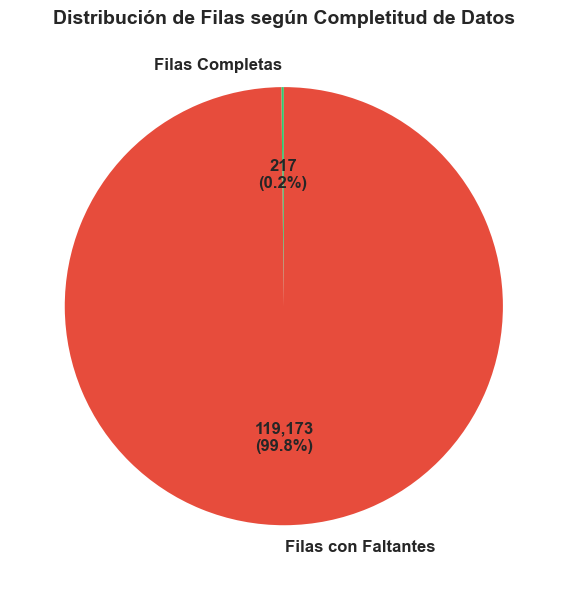


 Conclusión:
    Más del 15% de las filas tienen valores faltantes - requiere atención


In [20]:
# Analizar filas con valores faltantes
print("\n ANÁLISIS DE FILAS CON VALORES FALTANTES")
print("="*100)

total_rows = len(df)
rows_with_missing = df.isnull().any(axis=1).sum()
rows_complete = total_rows - rows_with_missing

print(f"\n Distribución de filas:")
print(f"   - Filas completas (sin faltantes): {rows_complete:,} ({rows_complete/total_rows*100:.2f}%)")
print(f"   - Filas con al menos un faltante:  {rows_with_missing:,} ({rows_with_missing/total_rows*100:.2f}%)")

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Filas Completas', 'Filas con Faltantes']
values = [rows_complete, rows_with_missing]
colors_pie = ['#2ecc71', '#e74c3c']

wedges, texts, autotexts = ax.pie(values, labels=categories, autopct='%1.1f%%',
                                    colors=colors_pie, startangle=90,
                                    textprops={'fontsize': 12, 'fontweight': 'bold'})

# Añadir valores absolutos
for i, (text, autotext, val) in enumerate(zip(texts, autotexts, values)):
    autotext.set_text(f'{val:,}\n({val/total_rows*100:.1f}%)')

ax.set_title('Distribución de Filas según Completitud de Datos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n Conclusión:")
if rows_with_missing / total_rows < 0.05:
    print(f"    Menos del 5% de las filas tienen valores faltantes")
elif rows_with_missing / total_rows < 0.15:
    print(f"   ️  Entre 5-15% de las filas tienen valores faltantes")
else:
    print(f"    Más del 15% de las filas tienen valores faltantes - requiere atención")

---
##  4. ANÁLISIS DE DISTRIBUCIONES - VARIABLES NUMÉRICAS

### 4.1 Histogramas - Distribución de Variables Clave

 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS


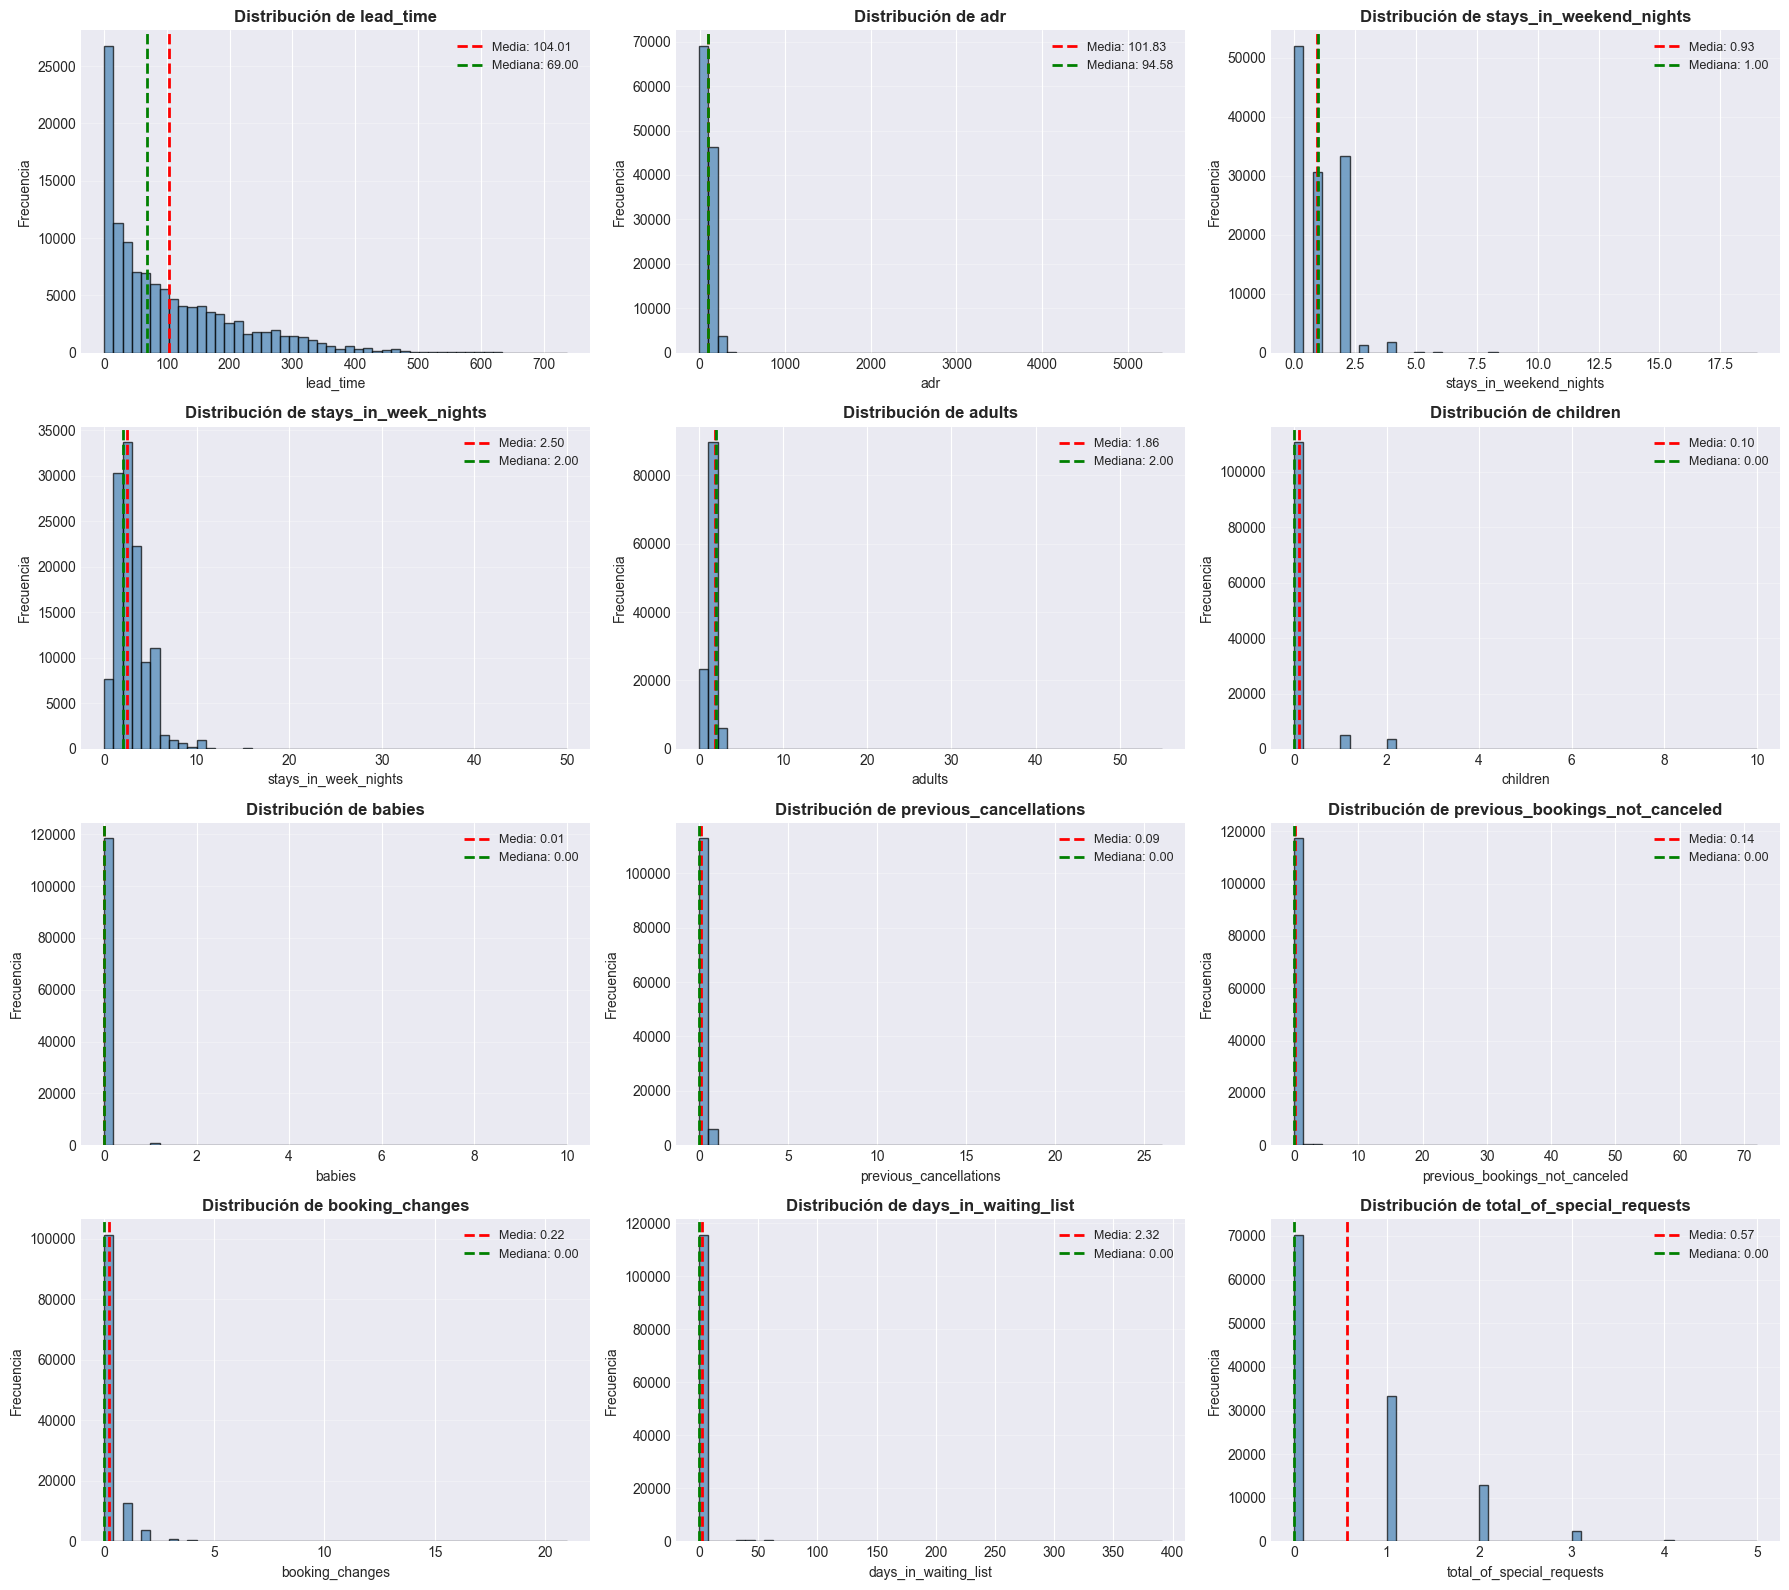


 Histogramas generados correctamente


In [21]:
# Histogramas de variables numéricas principales
print(" DISTRIBUCIÓN DE VARIABLES NUMÉRICAS")
print("="*100)

# Seleccionar variables numéricas más relevantes
vars_importantes = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'adults', 'children', 'babies', 'previous_cancellations',
                    'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'total_of_special_requests']

# Filtrar solo las que existen en el dataset
vars_importantes = [var for var in vars_importantes if var in numerical_cols]

# Crear subplots
n_vars = len(vars_importantes)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_vars > 1 else [axes]

for idx, var in enumerate(vars_importantes):
    ax = axes[idx]
    
    # Histograma
    df[var].hist(bins=50, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    
    # Líneas de referencia
    mean_val = df[var].mean()
    median_val = df[var].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    
    ax.set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
    ax.set_xlabel(var, fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(axis='y', alpha=0.3)

# Ocultar ejes vacíos
for idx in range(len(vars_importantes), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("\n Histogramas generados correctamente")

### 4.2 Boxplots - Detección de Outliers

 BOXPLOTS - DETECCIÓN DE VALORES ATÍPICOS


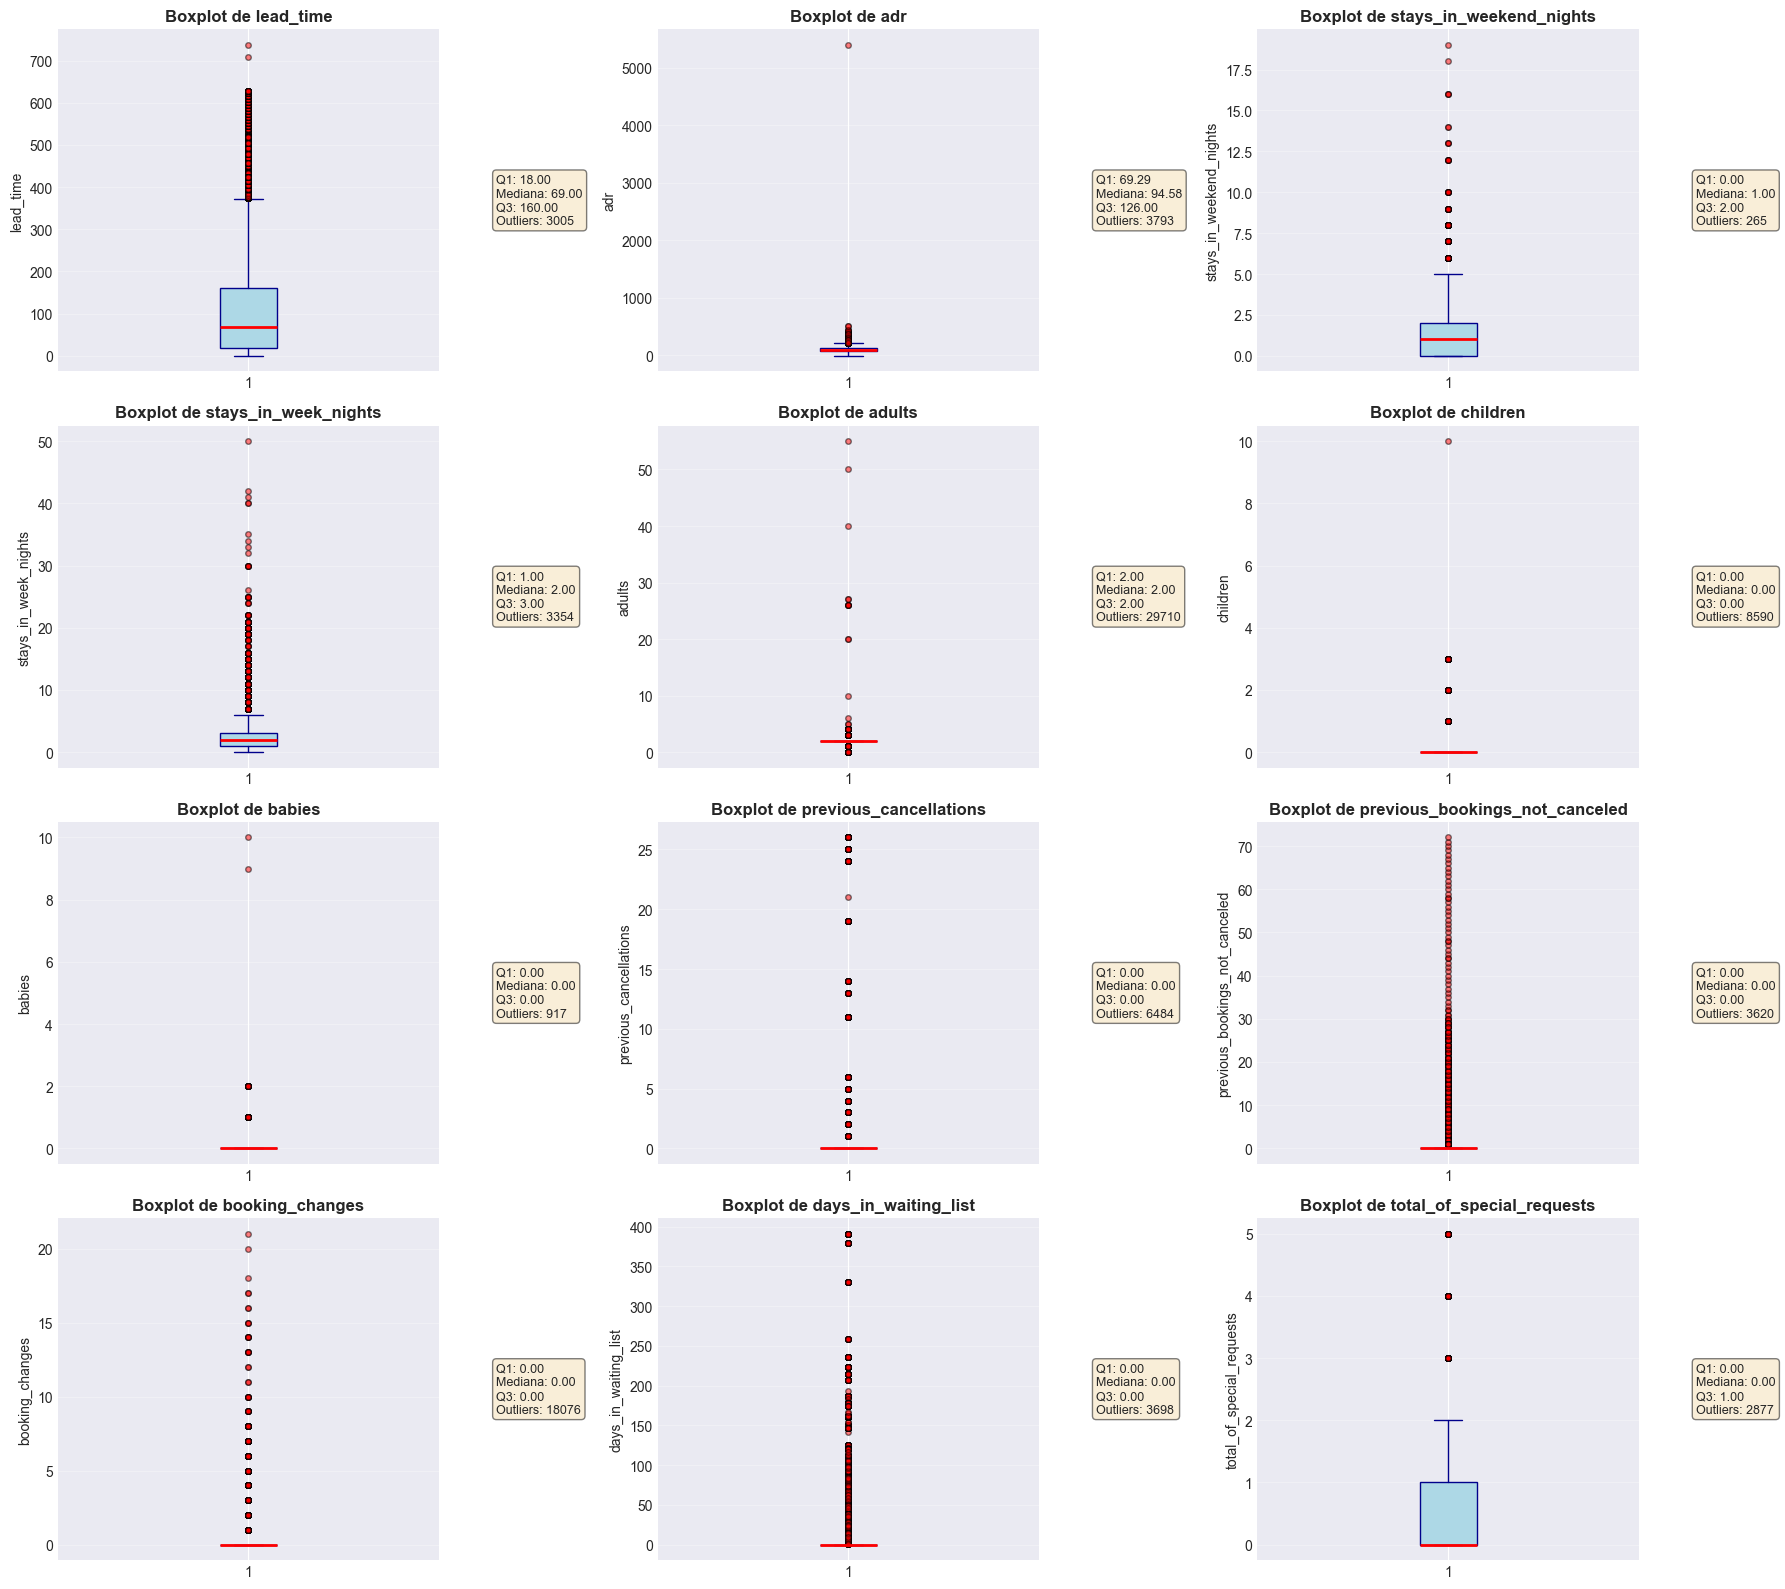


 Boxplots generados correctamente


In [22]:
# Boxplots para detectar outliers
print(" BOXPLOTS - DETECCIÓN DE VALORES ATÍPICOS")
print("="*100)

# Crear subplots para boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_vars > 1 else [axes]

for idx, var in enumerate(vars_importantes):
    ax = axes[idx]
    
    # Boxplot
    box = ax.boxplot(df[var].dropna(), vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='darkblue'),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='darkblue'),
                     capprops=dict(color='darkblue'),
                     flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
    
    ax.set_title(f'Boxplot de {var}', fontsize=12, fontweight='bold')
    ax.set_ylabel(var, fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Añadir estadísticas
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((df[var] < lower_bound) | (df[var] > upper_bound)).sum()
    
    stats_text = f'Q1: {q1:.2f}\nMediana: {df[var].median():.2f}\nQ3: {q3:.2f}\nOutliers: {outliers}'
    ax.text(1.15, 0.5, stats_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Ocultar ejes vacíos
for idx in range(len(vars_importantes), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("\n Boxplots generados correctamente")


 ANÁLISIS DETALLADO DE OUTLIERS

Resumen de outliers por variable:
                      Variable     Q1      Q3     IQR  Límite Inferior  Límite Superior  Outliers  % Outliers
                        adults  2.000   2.000   0.000            2.000            2.000     29710      24.885
               booking_changes  0.000   0.000   0.000            0.000            0.000     18076      15.140
                      children  0.000   0.000   0.000            0.000            0.000      8590       7.195
        previous_cancellations  0.000   0.000   0.000            0.000            0.000      6484       5.431
                           adr 69.290 126.000  56.710          -15.775          211.065      3793       3.177
          days_in_waiting_list  0.000   0.000   0.000            0.000            0.000      3698       3.097
previous_bookings_not_canceled  0.000   0.000   0.000            0.000            0.000      3620       3.032
          stays_in_week_nights  1.000   3.000   2.00

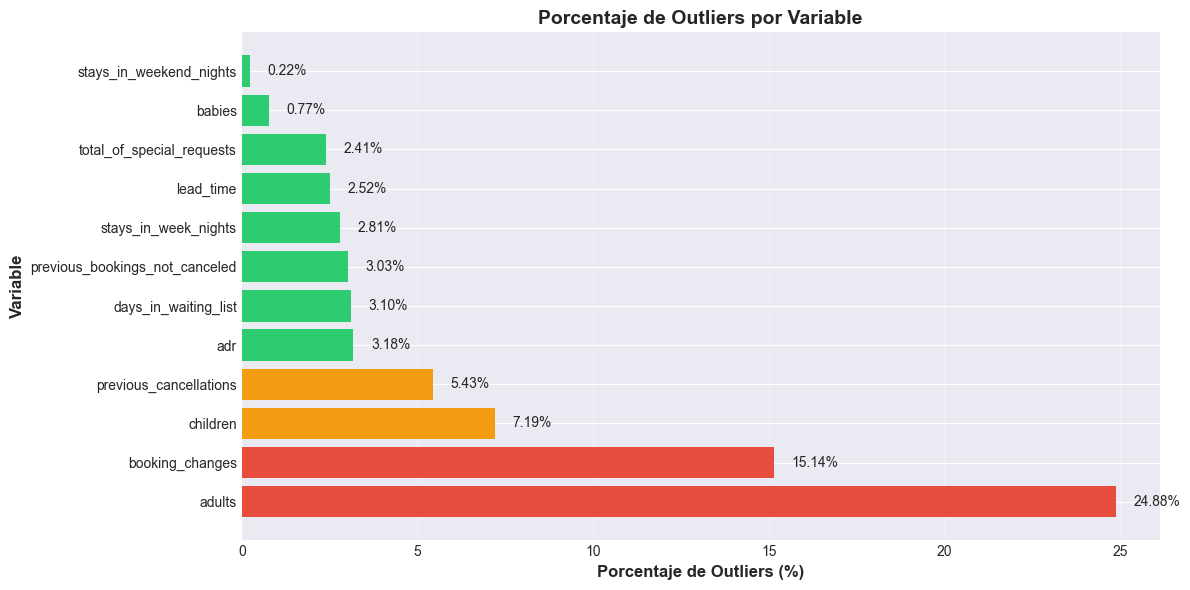


 Interpretación:
    Verde: < 5% outliers (aceptable)
    Naranja: 5-10% outliers (moderado)
    Rojo: > 10% outliers (alto)


In [23]:
# Análisis detallado de outliers
print("\n ANÁLISIS DETALLADO DE OUTLIERS")
print("="*100)

outlier_summary = []

for var in vars_importantes:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_count = ((df[var] < lower_bound) | (df[var] > upper_bound)).sum()
    outliers_pct = (outliers_count / len(df)) * 100
    
    outlier_summary.append({
        'Variable': var,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Límite Inferior': lower_bound,
        'Límite Superior': upper_bound,
        'Outliers': outliers_count,
        '% Outliers': outliers_pct
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('% Outliers', ascending=False)

print("\nResumen de outliers por variable:")
print(outlier_df.to_string(index=False))

# Gráfico de porcentaje de outliers
fig, ax = plt.subplots(figsize=(12, 6))

colors_out = ['#e74c3c' if x > 10 else '#f39c12' if x > 5 else '#2ecc71' 
              for x in outlier_df['% Outliers']]

bars = ax.barh(outlier_df['Variable'], outlier_df['% Outliers'], color=colors_out)
ax.set_xlabel('Porcentaje de Outliers (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Variable', fontsize=12, fontweight='bold')
ax.set_title('Porcentaje de Outliers por Variable', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for bar, val in zip(bars, outlier_df['% Outliers']):
    ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{val:.2f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n Interpretación:")
print(f"    Verde: < 5% outliers (aceptable)")
print(f"    Naranja: 5-10% outliers (moderado)")
print(f"    Rojo: > 10% outliers (alto)")

### 4.3 Distribuciones por Variable Objetivo

 DISTRIBUCIONES SEGÚN VARIABLE OBJETIVO (is_canceled)


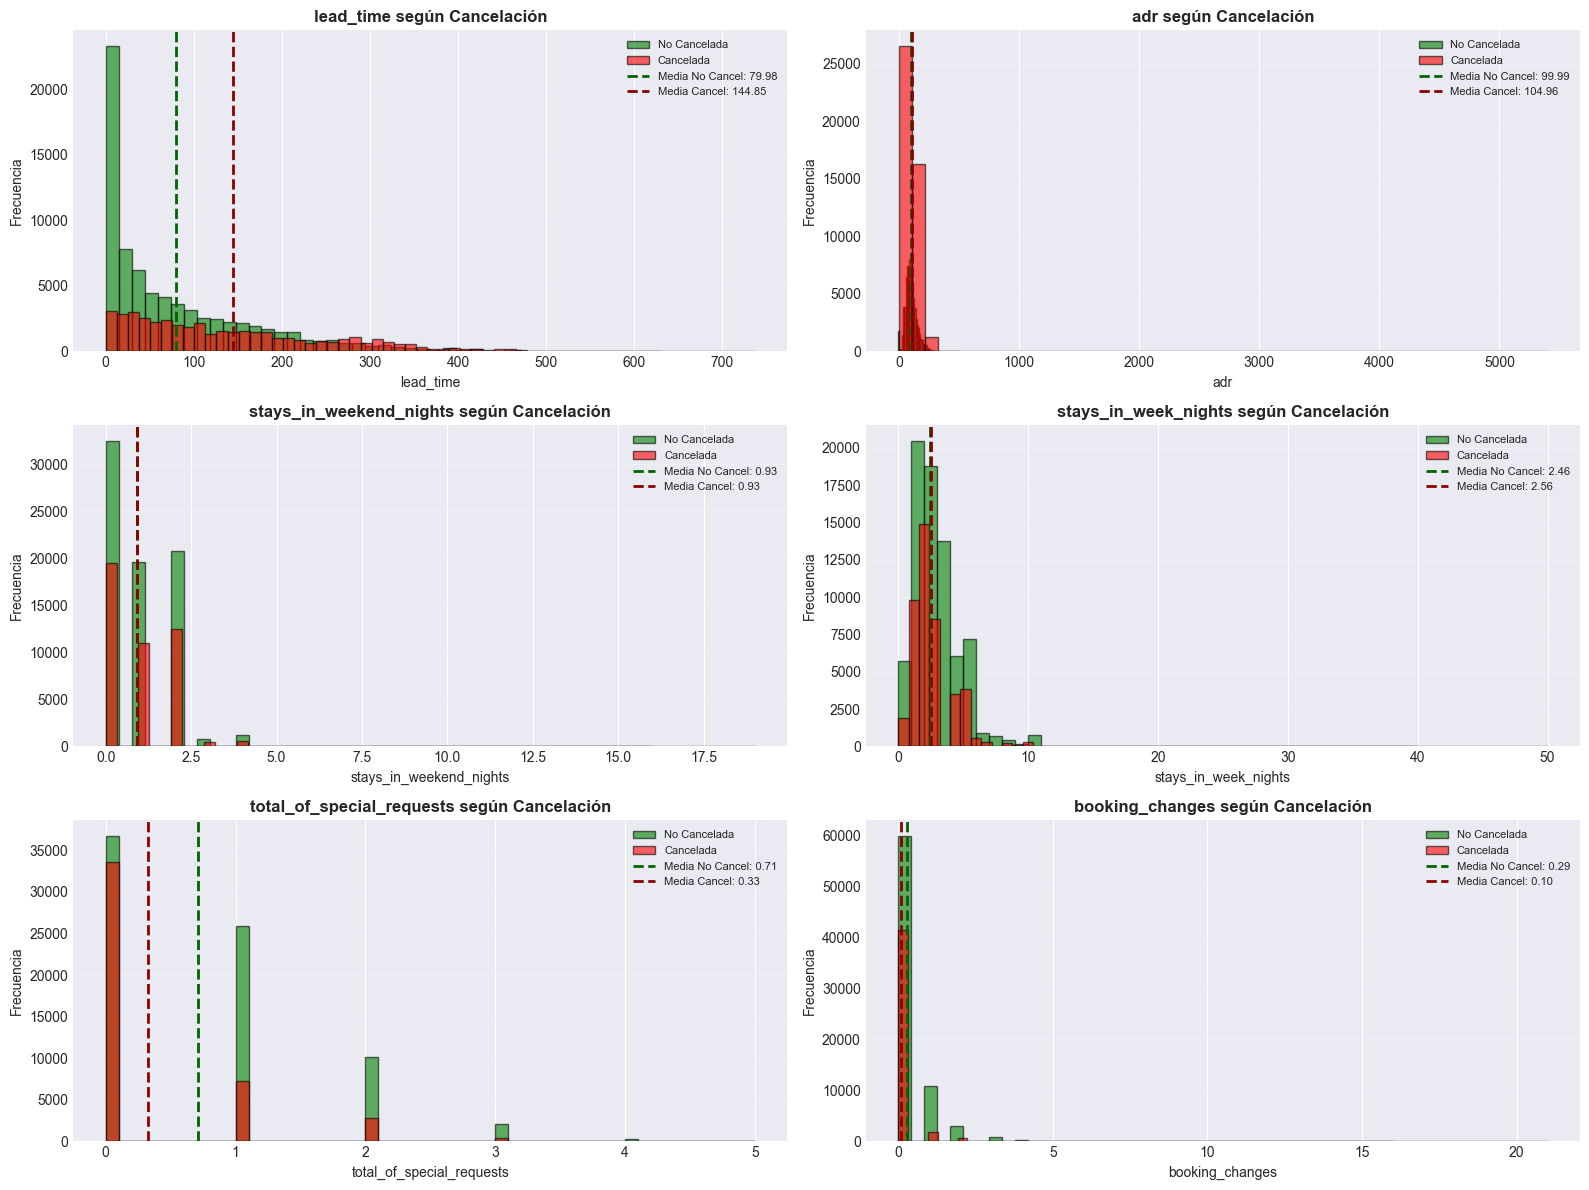


 Comparación de distribuciones completada


In [24]:
# Comparar distribuciones según cancelación
print(" DISTRIBUCIONES SEGÚN VARIABLE OBJETIVO (is_canceled)")
print("="*100)

# Variables más relevantes para comparar
vars_comparar = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
                 'total_of_special_requests', 'booking_changes']
vars_comparar = [var for var in vars_comparar if var in numerical_cols]

n_vars_comp = len(vars_comparar)
n_cols_comp = 2
n_rows_comp = (n_vars_comp + n_cols_comp - 1) // n_cols_comp

fig, axes = plt.subplots(n_rows_comp, n_cols_comp, figsize=(16, n_rows_comp * 4))
axes = axes.flatten() if n_vars_comp > 1 else [axes]

for idx, var in enumerate(vars_comparar):
    ax = axes[idx]
    
    # Separar por cancelación
    no_canceled = df[df['is_canceled'] == 0][var].dropna()
    canceled = df[df['is_canceled'] == 1][var].dropna()
    
    # Histogramas superpuestos
    ax.hist(no_canceled, bins=50, alpha=0.6, label='No Cancelada', color='green', edgecolor='black')
    ax.hist(canceled, bins=50, alpha=0.6, label='Cancelada', color='red', edgecolor='black')
    
    # Líneas de media
    ax.axvline(no_canceled.mean(), color='darkgreen', linestyle='--', linewidth=2, 
               label=f'Media No Cancel: {no_canceled.mean():.2f}')
    ax.axvline(canceled.mean(), color='darkred', linestyle='--', linewidth=2,
               label=f'Media Cancel: {canceled.mean():.2f}')
    
    ax.set_title(f'{var} según Cancelación', fontsize=12, fontweight='bold')
    ax.set_xlabel(var, fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(axis='y', alpha=0.3)

# Ocultar ejes vacíos
for idx in range(n_vars_comp, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("\n Comparación de distribuciones completada")

In [25]:
# Análisis estadístico de diferencias entre grupos
print("\n COMPARACIÓN ESTADÍSTICA: Canceladas vs No Canceladas")
print("="*100)

comparison_stats = []

for var in vars_comparar:
    no_canceled = df[df['is_canceled'] == 0][var].dropna()
    canceled = df[df['is_canceled'] == 1][var].dropna()
    
    comparison_stats.append({
        'Variable': var,
        'Media No Cancel': no_canceled.mean(),
        'Media Cancel': canceled.mean(),
        'Diferencia': canceled.mean() - no_canceled.mean(),
        '% Diferencia': ((canceled.mean() - no_canceled.mean()) / no_canceled.mean() * 100) if no_canceled.mean() != 0 else 0,
        'Mediana No Cancel': no_canceled.median(),
        'Mediana Cancel': canceled.median()
    })

comp_df = pd.DataFrame(comparison_stats)
comp_df = comp_df.sort_values('% Diferencia', key=abs, ascending=False)

print("\nDiferencias en medias por variable:")
print(comp_df.to_string(index=False))

print("\n\n Insights:")
for _, row in comp_df.head(3).iterrows():
    print(f"\n {row['Variable']}:")
    if abs(row['% Diferencia']) > 10:
        direction = "mayor" if row['% Diferencia'] > 0 else "menor"
        print(f"   Las reservas canceladas tienen {direction} {row['Variable']} ({abs(row['% Diferencia']):.1f}% de diferencia)")
    else:
        print(f"   Diferencia mínima entre grupos ({abs(row['% Diferencia']):.1f}%)")


 COMPARACIÓN ESTADÍSTICA: Canceladas vs No Canceladas

Diferencias en medias por variable:
                 Variable  Media No Cancel  Media Cancel  Diferencia  % Diferencia  Mediana No Cancel  Mediana Cancel
                lead_time           79.985       144.849      64.864        81.096             45.000         113.000
          booking_changes            0.293         0.098      -0.195       -66.478              0.000           0.000
total_of_special_requests            0.714         0.329      -0.385       -53.950              1.000           0.000
                      adr           99.988       104.964       4.977         4.977             92.500          96.200
     stays_in_week_nights            2.464         2.562       0.098         3.971              2.000           2.000
  stays_in_weekend_nights            0.929         0.925      -0.004        -0.399              1.000           1.000


 Insights:

 lead_time:
   Las reservas canceladas tienen mayor lead_time (81.1%

---
## ️ 5. ANÁLISIS DE DISTRIBUCIONES - VARIABLES CATEGÓRICAS

### 5.1 Gráficos de Barras - Distribución de Categorías

️  DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS


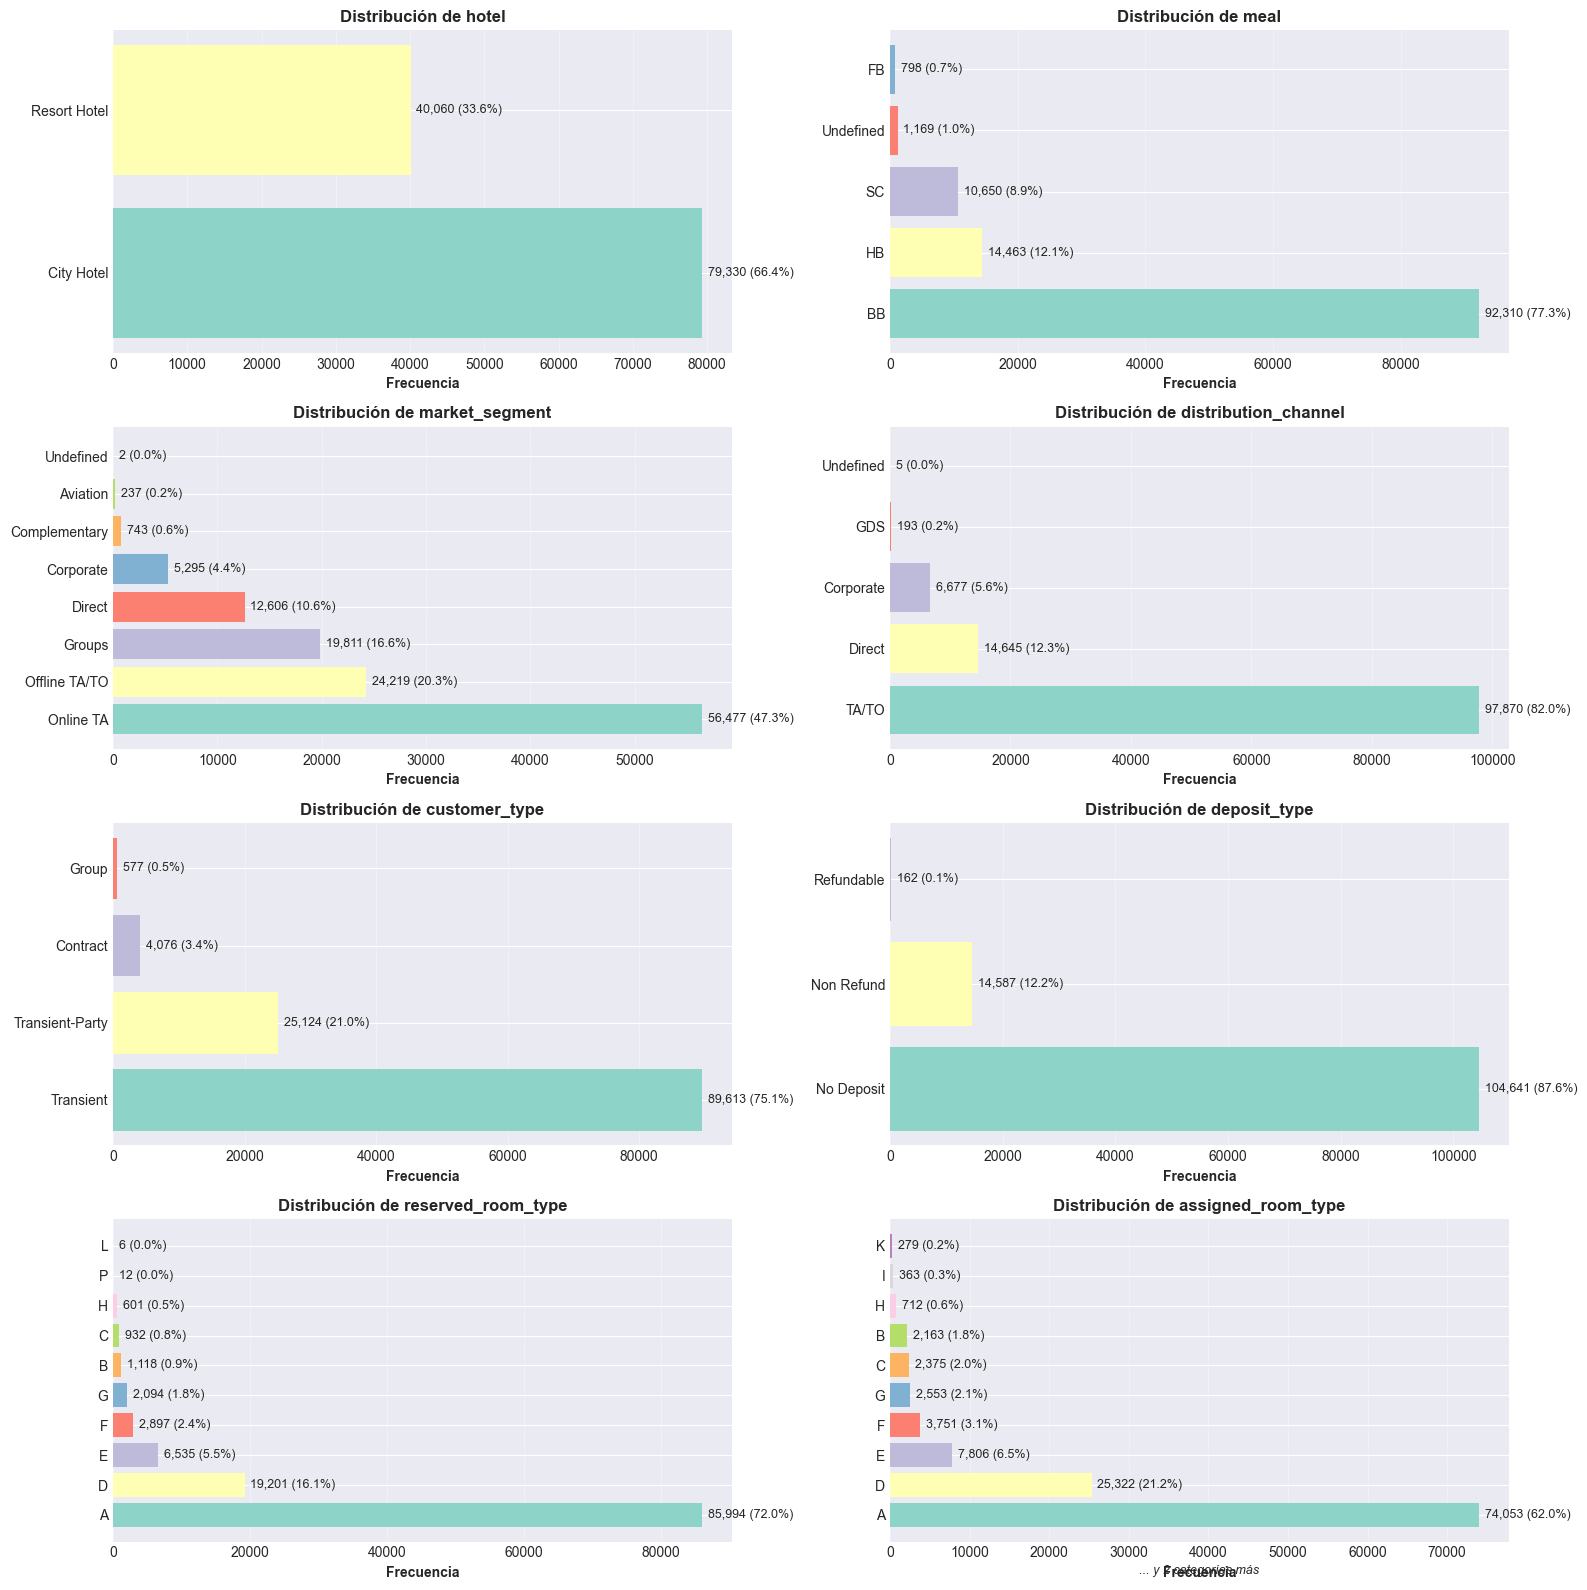


 Gráficos de distribución categórica generados


In [26]:
# Análisis de variables categóricas principales
print("️  DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS")
print("="*100)

# Variables categóricas más relevantes
vars_cat_principales = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                        'customer_type', 'deposit_type', 'reserved_room_type', 'assigned_room_type']

# Filtrar solo las que existen
vars_cat_principales = [var for var in vars_cat_principales if var in categorical_cols]

n_vars_cat = len(vars_cat_principales)
n_cols_cat = 2
n_rows_cat = (n_vars_cat + n_cols_cat - 1) // n_cols_cat

fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(16, n_rows_cat * 4))
axes = axes.flatten() if n_vars_cat > 1 else [axes]

for idx, var in enumerate(vars_cat_principales):
    ax = axes[idx]
    
    # Contar valores
    value_counts = df[var].value_counts().head(10)  # Top 10
    value_pct = (value_counts / len(df) * 100)
    
    # Crear gráfico de barras
    colors_cat = plt.cm.Set3(range(len(value_counts)))
    bars = ax.barh(range(len(value_counts)), value_counts.values, color=colors_cat)
    
    # Etiquetas
    ax.set_yticks(range(len(value_counts)))
    ax.set_yticklabels(value_counts.index)
    ax.set_xlabel('Frecuencia', fontsize=10, fontweight='bold')
    ax.set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Añadir valores y porcentajes
    for i, (bar, val, pct) in enumerate(zip(bars, value_counts.values, value_pct.values)):
        ax.text(val + max(value_counts)*0.01, bar.get_y() + bar.get_height()/2,
                f'{val:,} ({pct:.1f}%)', va='center', fontsize=9)
    
    # Mostrar si hay más categorías
    if len(df[var].unique()) > 10:
        ax.text(0.5, -0.1, f'... y {len(df[var].unique()) - 10} categorías más',
                transform=ax.transAxes, ha='center', fontsize=9, style='italic')

# Ocultar ejes vacíos
for idx in range(n_vars_cat, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("\n Gráficos de distribución categórica generados")

### 5.2 Análisis por Variable Objetivo

 TASA DE CANCELACIÓN POR CATEGORÍA


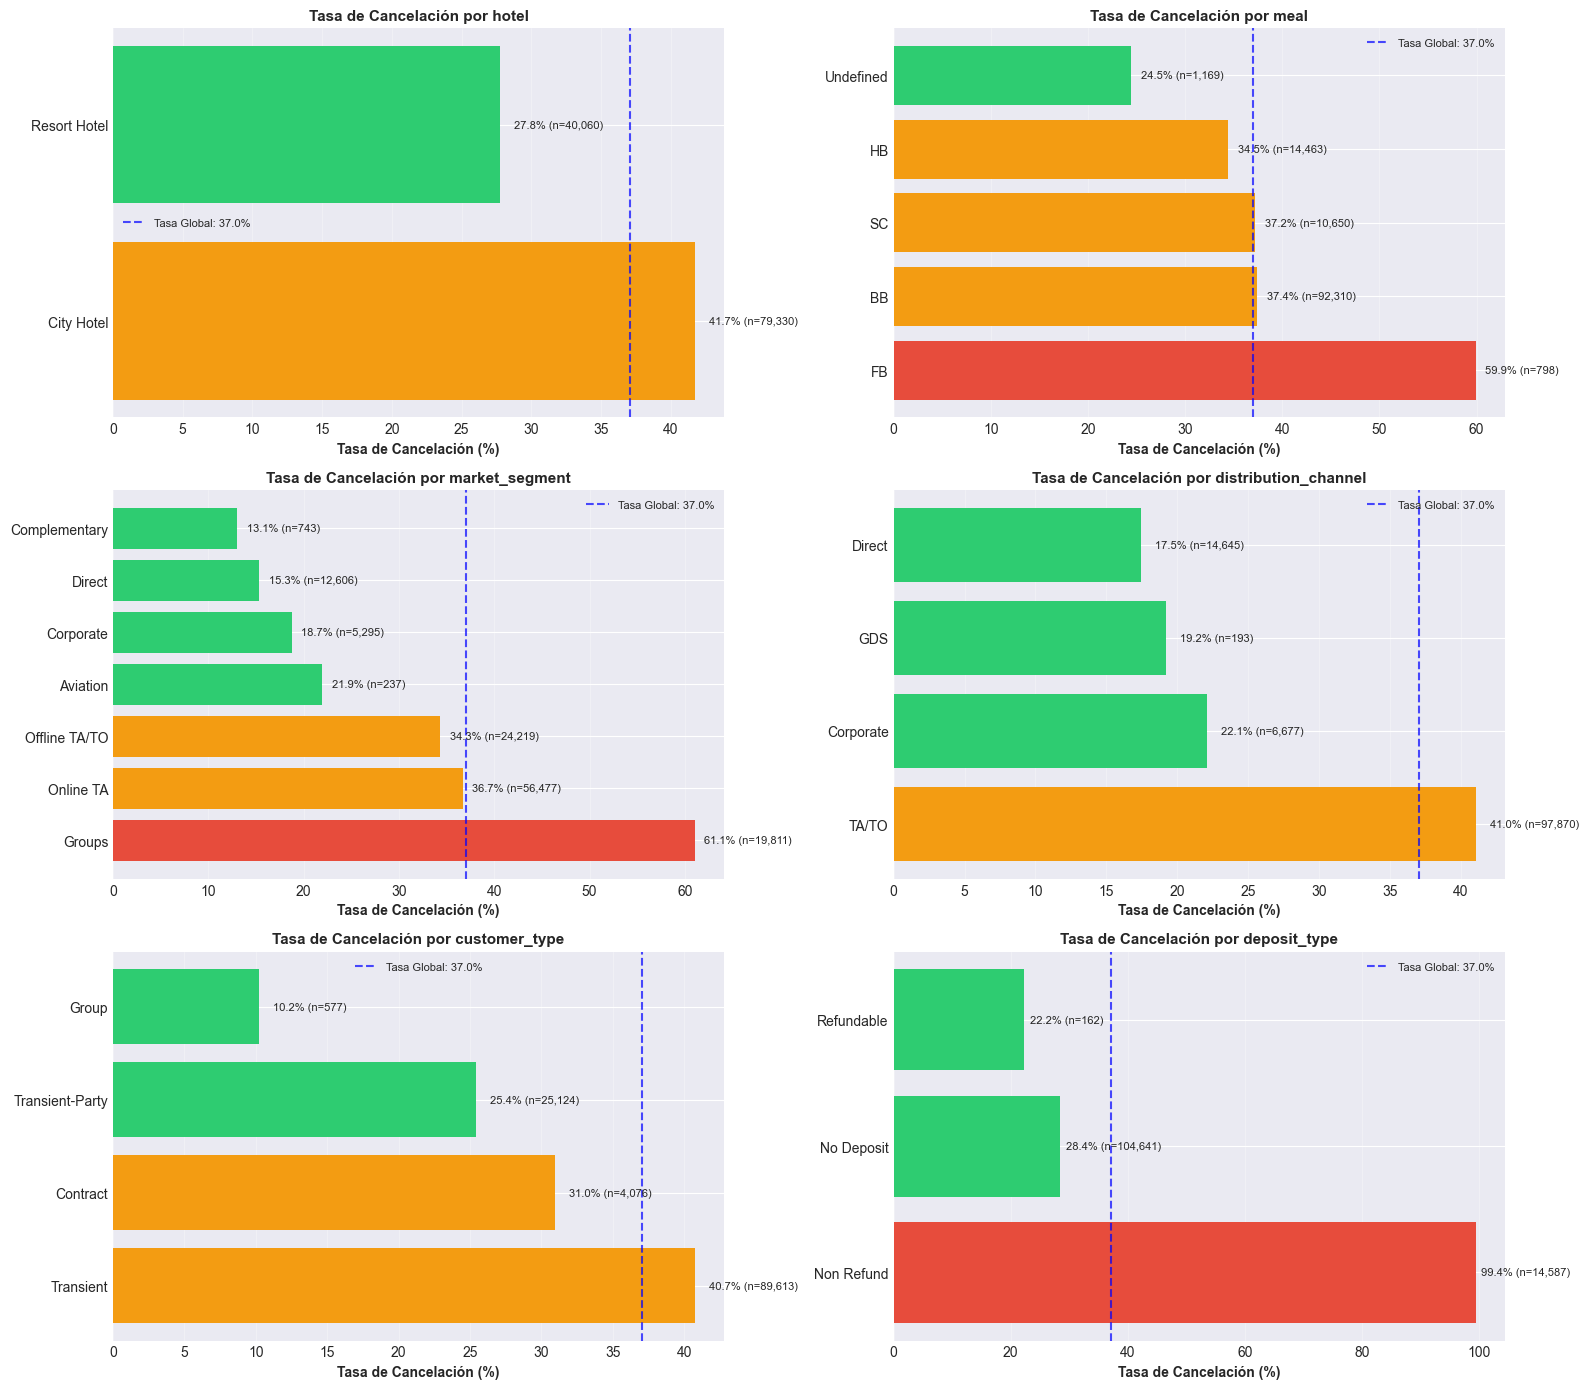


 Análisis de tasa de cancelación por categoría completado


In [27]:
# Tasa de cancelación por categoría
print(" TASA DE CANCELACIÓN POR CATEGORÍA")
print("="*100)

# Variables categóricas clave para análisis
vars_analizar = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                 'customer_type', 'deposit_type']
vars_analizar = [var for var in vars_analizar if var in categorical_cols]

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, var in enumerate(vars_analizar):
    ax = axes[idx]
    
    # Calcular tasa de cancelación por categoría
    cancel_rate = df.groupby(var)['is_canceled'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    cancel_rate['mean'] = cancel_rate['mean'] * 100  # Convertir a porcentaje
    
    # Filtrar categorías con al menos 100 observaciones para mayor confiabilidad
    cancel_rate_filtered = cancel_rate[cancel_rate['count'] >= 100].head(10)
    
    if len(cancel_rate_filtered) > 0:
        # Gráfico de barras
        colors_cancel = ['#e74c3c' if x > 50 else '#f39c12' if x > 30 else '#2ecc71' 
                        for x in cancel_rate_filtered['mean']]
        
        bars = ax.barh(range(len(cancel_rate_filtered)), cancel_rate_filtered['mean'], color=colors_cancel)
        
        ax.set_yticks(range(len(cancel_rate_filtered)))
        ax.set_yticklabels(cancel_rate_filtered.index)
        ax.set_xlabel('Tasa de Cancelación (%)', fontsize=10, fontweight='bold')
        ax.set_title(f'Tasa de Cancelación por {var}', fontsize=11, fontweight='bold')
        ax.grid(axis='x', alpha=0.3)
        
        # Añadir valores
        for i, (bar, val, count) in enumerate(zip(bars, cancel_rate_filtered['mean'], 
                                                   cancel_rate_filtered['count'])):
            ax.text(val + 1, bar.get_y() + bar.get_height()/2,
                   f'{val:.1f}% (n={count:,})', va='center', fontsize=8)
        
        # Línea de referencia (tasa global)
        global_rate = df['is_canceled'].mean() * 100
        ax.axvline(global_rate, color='blue', linestyle='--', linewidth=1.5, 
                  label=f'Tasa Global: {global_rate:.1f}%', alpha=0.7)
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

print("\n Análisis de tasa de cancelación por categoría completado")

In [28]:
# Tabla resumen de tasas de cancelación
print("\n RESUMEN DE TASAS DE CANCELACIÓN POR VARIABLE")
print("="*100)

summary_cancellation = []

for var in vars_analizar:
    cancel_by_cat = df.groupby(var)['is_canceled'].mean() * 100
    
    summary_cancellation.append({
        'Variable': var,
        'Categorías': df[var].nunique(),
        'Tasa Min (%)': cancel_by_cat.min(),
        'Tasa Max (%)': cancel_by_cat.max(),
        'Rango (%)': cancel_by_cat.max() - cancel_by_cat.min(),
        'Tasa Media (%)': cancel_by_cat.mean()
    })

summary_df = pd.DataFrame(summary_cancellation)
summary_df = summary_df.sort_values('Rango (%)', ascending=False)

print("\nVariabilidad de tasa de cancelación por variable categórica:")
print(summary_df.to_string(index=False))

print("\n\n Insights clave:")
for _, row in summary_df.head(3).iterrows():
    print(f"\n {row['Variable']}:")
    print(f"   - Rango de tasas: {row['Tasa Min (%)']:.1f}% a {row['Tasa Max (%)']:.1f}%")
    print(f"   - Variabilidad: {row['Rango (%)']:.1f} puntos porcentuales")
    if row['Rango (%)'] > 30:
        print(f"   ⭐ Alta capacidad predictiva (gran variabilidad entre categorías)")


 RESUMEN DE TASAS DE CANCELACIÓN POR VARIABLE

Variabilidad de tasa de cancelación por variable categórica:
            Variable  Categorías  Tasa Min (%)  Tasa Max (%)  Rango (%)  Tasa Media (%)
      market_segment           8        13.055       100.000     86.945          37.646
        deposit_type           3        22.222        99.362     77.140          49.987
distribution_channel           5        17.460        80.000     62.540          35.947
                meal           5        24.465        59.900     35.434          38.690
       customer_type           4        10.225        40.746     30.521          26.841
               hotel           2        27.763        41.727     13.964          34.745


 Insights clave:

 market_segment:
   - Rango de tasas: 13.1% a 100.0%
   - Variabilidad: 86.9 puntos porcentuales
   ⭐ Alta capacidad predictiva (gran variabilidad entre categorías)

 deposit_type:
   - Rango de tasas: 22.2% a 99.4%
   - Variabilidad: 77.1 puntos porcentu

### 5.3 Análisis de Top Países

 ANÁLISIS DE PAÍSES

 Total de países únicos: 177

Top 15 países por número de reservas:


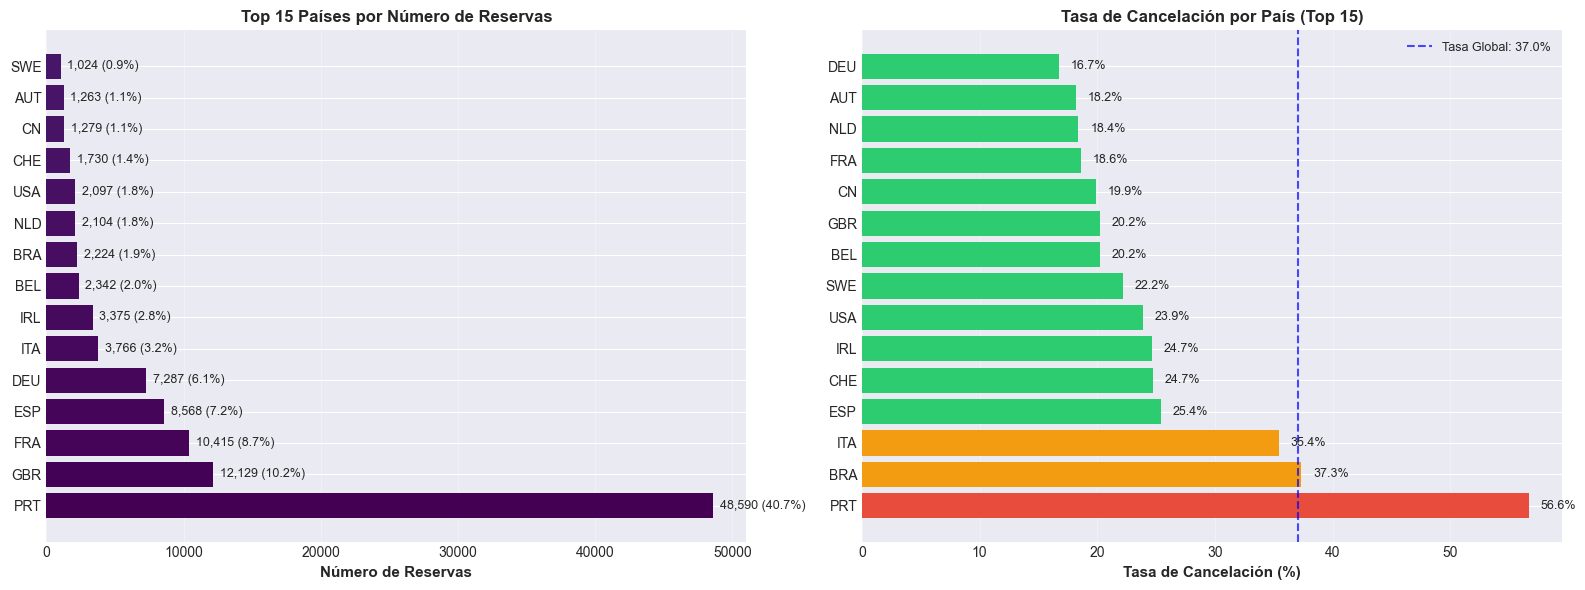


 Observaciones:
   - Top 3 países representan 59.6% de las reservas
   - País con mayor tasa de cancelación: PRT (56.6%)
   - País con menor tasa de cancelación: DEU (16.7%)


In [29]:
# Análisis de países (variable de alta cardinalidad)
print(" ANÁLISIS DE PAÍSES")
print("="*100)

if 'country' in df.columns:
    # Top 15 países por número de reservas
    top_countries = df['country'].value_counts().head(15)
    
    print(f"\n Total de países únicos: {df['country'].nunique()}")
    print(f"\nTop 15 países por número de reservas:")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Top países por reservas
    ax1 = axes[0]
    colors_countries = plt.cm.viridis(range(len(top_countries)))
    bars1 = ax1.barh(range(len(top_countries)), top_countries.values, color=colors_countries)
    
    ax1.set_yticks(range(len(top_countries)))
    ax1.set_yticklabels(top_countries.index)
    ax1.set_xlabel('Número de Reservas', fontsize=11, fontweight='bold')
    ax1.set_title('Top 15 Países por Número de Reservas', fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, (bar, val) in enumerate(zip(bars1, top_countries.values)):
        pct = (val / len(df)) * 100
        ax1.text(val + max(top_countries)*0.01, bar.get_y() + bar.get_height()/2,
                f'{val:,} ({pct:.1f}%)', va='center', fontsize=9)
    
    # Gráfico 2: Tasa de cancelación por país
    ax2 = axes[1]
    
    # Calcular tasa de cancelación para top países
    cancel_by_country = df[df['country'].isin(top_countries.index)].groupby('country')['is_canceled'].mean() * 100
    cancel_by_country = cancel_by_country.sort_values(ascending=False)
    
    colors_cancel_country = ['#e74c3c' if x > 50 else '#f39c12' if x > 30 else '#2ecc71' 
                             for x in cancel_by_country.values]
    
    bars2 = ax2.barh(range(len(cancel_by_country)), cancel_by_country.values, color=colors_cancel_country)
    
    ax2.set_yticks(range(len(cancel_by_country)))
    ax2.set_yticklabels(cancel_by_country.index)
    ax2.set_xlabel('Tasa de Cancelación (%)', fontsize=11, fontweight='bold')
    ax2.set_title('Tasa de Cancelación por País (Top 15)', fontsize=12, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, (bar, val) in enumerate(zip(bars2, cancel_by_country.values)):
        ax2.text(val + 1, bar.get_y() + bar.get_height()/2,
                f'{val:.1f}%', va='center', fontsize=9)
    
    # Línea de tasa global
    global_rate = df['is_canceled'].mean() * 100
    ax2.axvline(global_rate, color='blue', linestyle='--', linewidth=1.5, 
               label=f'Tasa Global: {global_rate:.1f}%', alpha=0.7)
    ax2.legend(fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n Observaciones:")
    print(f"   - Top 3 países representan {(top_countries.head(3).sum() / len(df) * 100):.1f}% de las reservas")
    print(f"   - País con mayor tasa de cancelación: {cancel_by_country.idxmax()} ({cancel_by_country.max():.1f}%)")
    print(f"   - País con menor tasa de cancelación: {cancel_by_country.idxmin()} ({cancel_by_country.min():.1f}%)")
else:
    print("️  Variable 'country' no encontrada en el dataset")

### 5.4 Análisis Temporal

 ANÁLISIS TEMPORAL DE RESERVAS


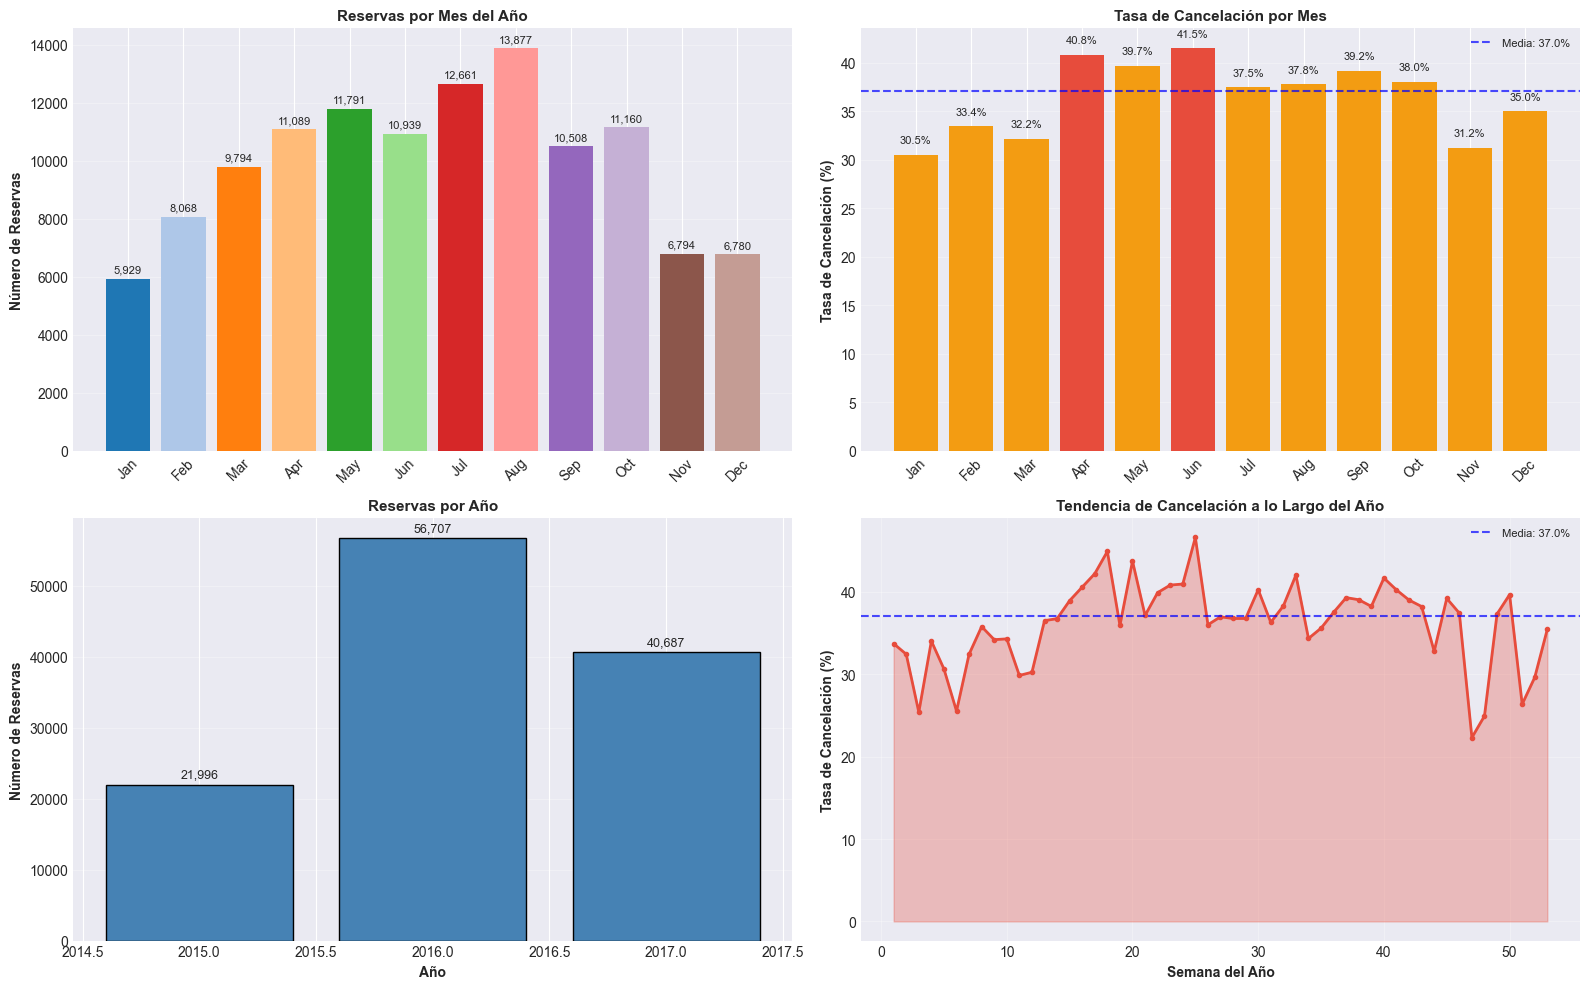


 Análisis temporal completado


In [30]:
# Análisis temporal de reservas y cancelaciones
print(" ANÁLISIS TEMPORAL DE RESERVAS")
print("="*100)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Reservas por mes
ax1 = axes[0, 0]
if 'arrival_date_month' in df.columns:
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    month_counts = df['arrival_date_month'].value_counts()
    month_counts = month_counts.reindex([m for m in month_order if m in month_counts.index])
    
    colors_months = plt.cm.tab20(range(len(month_counts)))
    bars1 = ax1.bar(range(len(month_counts)), month_counts.values, color=colors_months)
    
    ax1.set_xticks(range(len(month_counts)))
    ax1.set_xticklabels([m[:3] for m in month_counts.index], rotation=45)
    ax1.set_ylabel('Número de Reservas', fontsize=10, fontweight='bold')
    ax1.set_title('Reservas por Mes del Año', fontsize=11, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)
    
    # Añadir valores
    for bar, val in zip(bars1, month_counts.values):
        ax1.text(bar.get_x() + bar.get_width()/2, val + max(month_counts)*0.01,
                f'{val:,}', ha='center', va='bottom', fontsize=8)

# 2. Tasa de cancelación por mes
ax2 = axes[0, 1]
if 'arrival_date_month' in df.columns:
    cancel_by_month = df.groupby('arrival_date_month')['is_canceled'].mean() * 100
    cancel_by_month = cancel_by_month.reindex([m for m in month_order if m in cancel_by_month.index])
    
    colors_cancel_month = ['#e74c3c' if x > 40 else '#f39c12' if x > 30 else '#2ecc71' 
                           for x in cancel_by_month.values]
    
    bars2 = ax2.bar(range(len(cancel_by_month)), cancel_by_month.values, color=colors_cancel_month)
    
    ax2.set_xticks(range(len(cancel_by_month)))
    ax2.set_xticklabels([m[:3] for m in cancel_by_month.index], rotation=45)
    ax2.set_ylabel('Tasa de Cancelación (%)', fontsize=10, fontweight='bold')
    ax2.set_title('Tasa de Cancelación por Mes', fontsize=11, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    
    # Línea de tasa global
    global_rate = df['is_canceled'].mean() * 100
    ax2.axhline(global_rate, color='blue', linestyle='--', linewidth=1.5, 
               label=f'Media: {global_rate:.1f}%', alpha=0.7)
    ax2.legend(fontsize=8)
    
    # Añadir valores
    for bar, val in zip(bars2, cancel_by_month.values):
        ax2.text(bar.get_x() + bar.get_width()/2, val + 1,
                f'{val:.1f}%', ha='center', va='bottom', fontsize=8)

# 3. Reservas por año
ax3 = axes[1, 0]
if 'arrival_date_year' in df.columns:
    year_counts = df['arrival_date_year'].value_counts().sort_index()
    
    bars3 = ax3.bar(year_counts.index, year_counts.values, color='steelblue', edgecolor='black')
    
    ax3.set_xlabel('Año', fontsize=10, fontweight='bold')
    ax3.set_ylabel('Número de Reservas', fontsize=10, fontweight='bold')
    ax3.set_title('Reservas por Año', fontsize=11, fontweight='bold')
    ax3.grid(axis='y', alpha=0.3)
    
    # Añadir valores
    for bar, val in zip(bars3, year_counts.values):
        ax3.text(bar.get_x() + bar.get_width()/2, val + max(year_counts)*0.01,
                f'{val:,}', ha='center', va='bottom', fontsize=9)

# 4. Distribución por día de la semana (semana del año)
ax4 = axes[1, 1]
if 'arrival_date_week_number' in df.columns:
    # Agrupar por semana del año
    week_cancel = df.groupby('arrival_date_week_number').agg({
        'is_canceled': 'mean'
    }).reset_index()
    week_cancel['is_canceled'] = week_cancel['is_canceled'] * 100
    
    ax4.plot(week_cancel['arrival_date_week_number'], week_cancel['is_canceled'], 
            color='#e74c3c', linewidth=2, marker='o', markersize=3)
    ax4.fill_between(week_cancel['arrival_date_week_number'], week_cancel['is_canceled'], 
                     alpha=0.3, color='#e74c3c')
    
    ax4.set_xlabel('Semana del Año', fontsize=10, fontweight='bold')
    ax4.set_ylabel('Tasa de Cancelación (%)', fontsize=10, fontweight='bold')
    ax4.set_title('Tendencia de Cancelación a lo Largo del Año', fontsize=11, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    # Línea de tasa global
    ax4.axhline(global_rate, color='blue', linestyle='--', linewidth=1.5, 
               label=f'Media: {global_rate:.1f}%', alpha=0.7)
    ax4.legend(fontsize=8)

plt.tight_layout()
plt.show()

print("\n Análisis temporal completado")

---
##  6. ANÁLISIS DE CORRELACIONES

### 6.1 Matriz de Correlación Completa

 MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS

 Matriz de correlación calculada (20 variables)
   Dimensión: 20 × 20


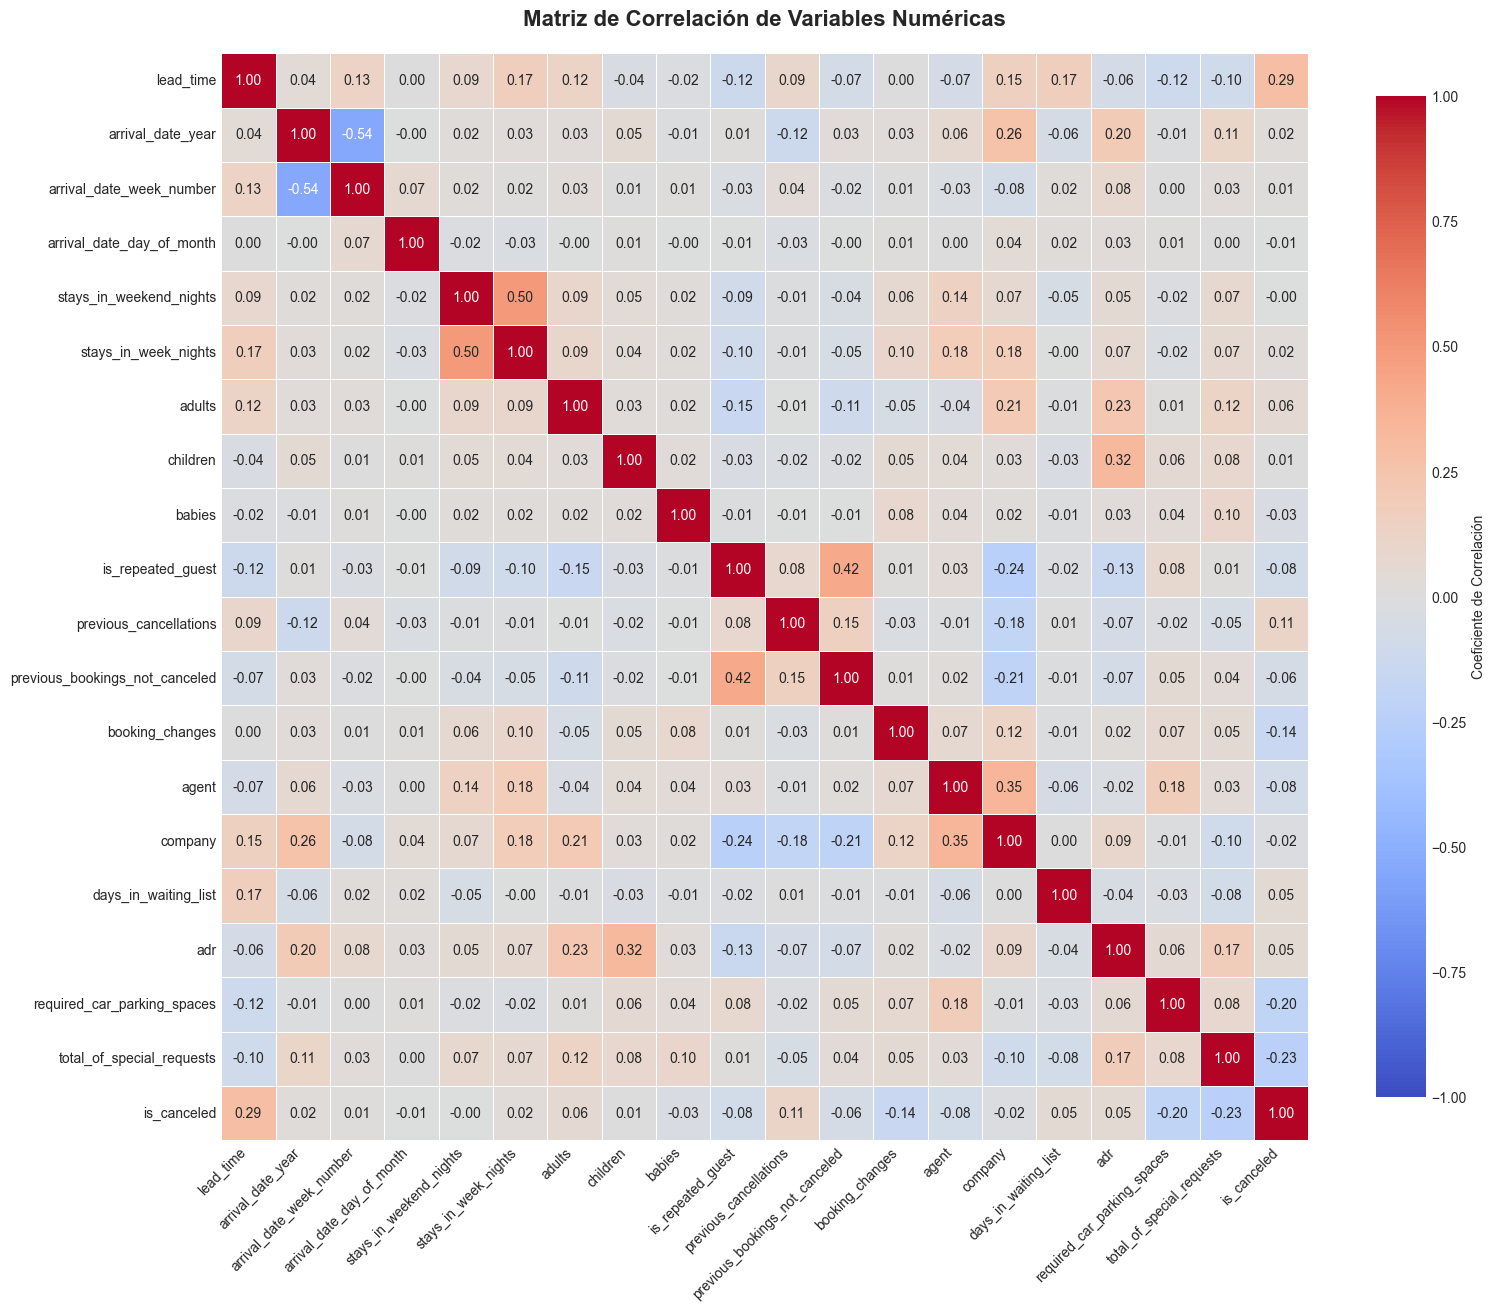


 Heatmap de correlación generado


In [31]:
# Calcular matriz de correlación
print(" MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS")
print("="*100)

# Seleccionar solo variables numéricas (incluyendo is_canceled)
numerical_cols_with_target = numerical_cols + ['is_canceled']
corr_matrix = df[numerical_cols_with_target].corr()

print(f"\n Matriz de correlación calculada ({len(numerical_cols_with_target)} variables)")
print(f"   Dimensión: {corr_matrix.shape[0]} × {corr_matrix.shape[1]}")

# Heatmap de correlación completo
fig, ax = plt.subplots(figsize=(16, 14))

# Crear heatmap
sns.heatmap(corr_matrix, 
            annot=True,  # Mostrar valores
            fmt='.2f',   # Formato de 2 decimales
            cmap='coolwarm',  # Escala de colores
            center=0,    # Centrar en 0
            square=True,  # Celdas cuadradas
            linewidths=0.5,  # Líneas entre celdas
            cbar_kws={'label': 'Coeficiente de Correlación', 'shrink': 0.8},
            vmin=-1, vmax=1,  # Rango de -1 a 1
            ax=ax)

ax.set_title('Matriz de Correlación de Variables Numéricas', 
            fontsize=16, fontweight='bold', pad=20)

# Rotar etiquetas
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n Heatmap de correlación generado")

### 6.2 Correlación con Variable Objetivo


 CORRELACIÓN CON VARIABLE OBJETIVO (is_canceled)

Top variables correlacionadas con cancelación:
----------------------------------------------------------------------------------------------------
  lead_time...............................  0.2931  (débil positiva)
  total_of_special_requests............... -0.2347  (débil negativa)
  required_car_parking_spaces............. -0.1955  (débil negativa)
  booking_changes......................... -0.1444  (débil negativa)
  previous_cancellations..................  0.1101  (débil positiva)
  is_repeated_guest....................... -0.0848  (débil negativa)
  agent................................... -0.0831  (débil negativa)
  adults..................................  0.0600  (débil positiva)
  previous_bookings_not_canceled.......... -0.0574  (débil negativa)
  days_in_waiting_list....................  0.0542  (débil positiva)
  adr.....................................  0.0476  (débil positiva)
  babies..................................

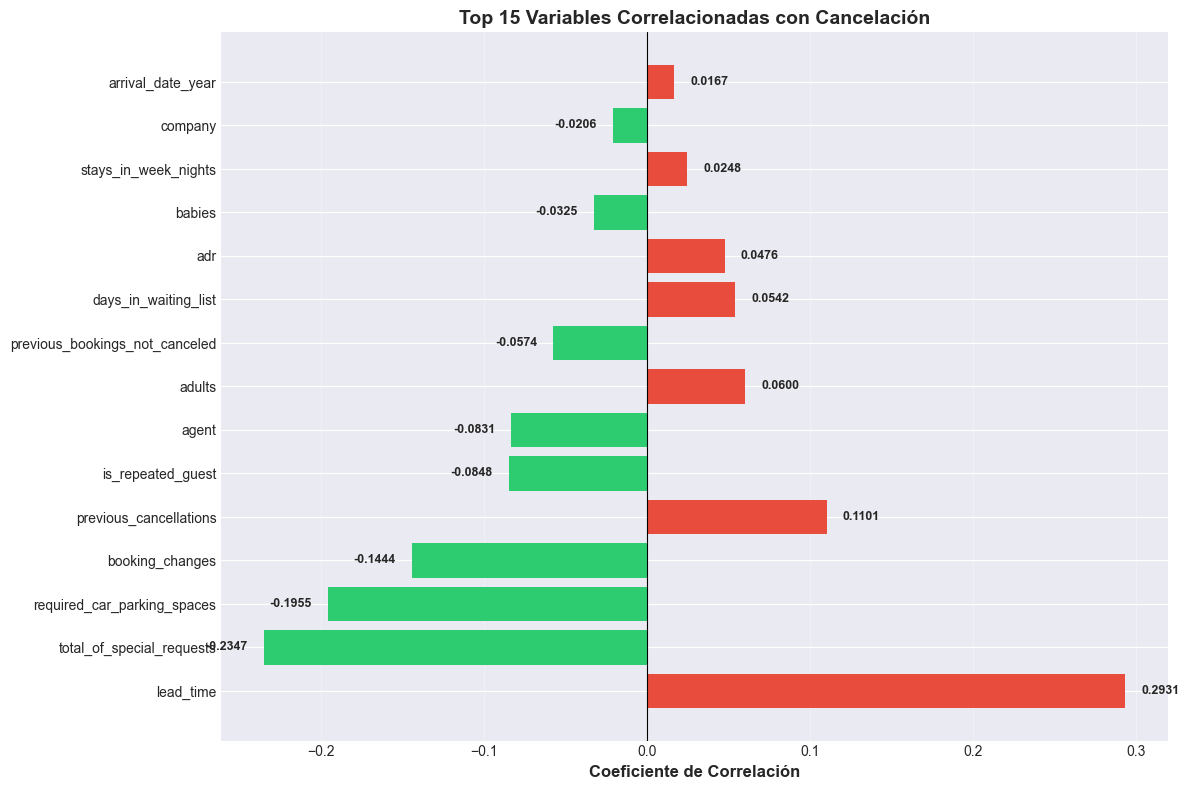


 Interpretación:
    Rojo: Correlación positiva (↑ variable → ↑ cancelación)
    Verde: Correlación negativa (↑ variable → ↓ cancelación)

   Variable más correlacionada: lead_time (0.2931)


In [32]:
# Correlación con la variable objetivo (is_canceled)
print("\n CORRELACIÓN CON VARIABLE OBJETIVO (is_canceled)")
print("="*100)

# Extraer correlaciones con is_canceled
target_corr = corr_matrix['is_canceled'].drop('is_canceled').sort_values(key=abs, ascending=False)

print("\nTop variables correlacionadas con cancelación:")
print("-" * 100)
for var, corr_val in target_corr.head(15).items():
    direction = "positiva" if corr_val > 0 else "negativa"
    strength = "fuerte" if abs(corr_val) > 0.5 else "moderada" if abs(corr_val) > 0.3 else "débil"
    print(f"  {var:.<40} {corr_val:>7.4f}  ({strength} {direction})")

# Gráfico de barras de correlación con target
fig, ax = plt.subplots(figsize=(12, 8))

# Top 15 correlaciones (positivas y negativas)
top_corr = target_corr.head(15)

colors_corr = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_corr.values]

bars = ax.barh(range(len(top_corr)), top_corr.values, color=colors_corr)

ax.set_yticks(range(len(top_corr)))
ax.set_yticklabels(top_corr.index)
ax.set_xlabel('Coeficiente de Correlación', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Variables Correlacionadas con Cancelación', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Añadir valores
for bar, val in zip(bars, top_corr.values):
    x_pos = val + (0.01 if val > 0 else -0.01)
    ha = 'left' if val > 0 else 'right'
    ax.text(x_pos, bar.get_y() + bar.get_height()/2,
           f'{val:.4f}', va='center', ha=ha, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n Interpretación:")
print(f"    Rojo: Correlación positiva (↑ variable → ↑ cancelación)")
print(f"    Verde: Correlación negativa (↑ variable → ↓ cancelación)")
print(f"\n   Variable más correlacionada: {target_corr.abs().idxmax()} ({target_corr.abs().max():.4f})")

### 6.3 Detección de Multicolinealidad

In [33]:
# Detectar pares de variables altamente correlacionadas
print("\n️  DETECCIÓN DE MULTICOLINEALIDAD")
print("="*100)

# Encontrar pares con alta correlación (> 0.7 o < -0.7)
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        var1 = corr_matrix.columns[i]
        var2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        
        if abs(corr_val) > 0.7:
            high_corr_pairs.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Correlación': corr_val
            })

if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlación', key=abs, ascending=False)
    
    print(f"\n️  Se encontraron {len(high_corr_pairs)} pares de variables con correlación > 0.7:")
    print("\n" + high_corr_df.to_string(index=False))
    
    print("\n\n Recomendaciones:")
    print("   - Considerar eliminar una de las variables altamente correlacionadas")
    print("   - Usar técnicas de reducción de dimensionalidad (PCA)")
    print("   - Usar regularización (Ridge, Lasso) en modelos lineales")
else:
    print("\n No se detectaron pares de variables con correlación > 0.7")
    print("   El dataset no presenta problemas graves de multicolinealidad")

# Visualizar solo las correlaciones más altas
print("\n\n PARES DE VARIABLES MÁS CORRELACIONADAS")
print("="*100)

# Crear matriz triangular superior para evitar duplicados
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
corr_upper = corr_matrix.where(mask)

# Encontrar top correlaciones (excluyendo correlación perfecta de 1.0)
corr_pairs_flat = corr_upper.stack().sort_values(key=abs, ascending=False)
top_10_corr = corr_pairs_flat.head(10)

print("\nTop 10 pares de variables más correlacionadas:")
print("-" * 100)
for (var1, var2), corr_val in top_10_corr.items():
    print(f"  {var1} <--> {var2:.<30} {corr_val:>7.4f}")


️  DETECCIÓN DE MULTICOLINEALIDAD

 No se detectaron pares de variables con correlación > 0.7
   El dataset no presenta problemas graves de multicolinealidad


 PARES DE VARIABLES MÁS CORRELACIONADAS

Top 10 pares de variables más correlacionadas:
----------------------------------------------------------------------------------------------------
  arrival_date_year <--> arrival_date_week_number...... -0.5406
  stays_in_weekend_nights <--> stays_in_week_nights..........  0.4990
  is_repeated_guest <--> previous_bookings_not_canceled  0.4181
  agent <--> company.......................  0.3507
  children <--> adr...........................  0.3249
  lead_time <--> is_canceled...................  0.2931
  arrival_date_year <--> company.......................  0.2591
  is_repeated_guest <--> company....................... -0.2446
  total_of_special_requests <--> is_canceled................... -0.2347
  adults <--> adr...........................  0.2306


### 6.4 Conclusiones del EDA

In [34]:
# Resumen ejecutivo del EDA
print("=" * 100)
print(" RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("=" * 100)

print("\n VARIABLE OBJETIVO:")
print(f"   - is_canceled: {df['is_canceled'].value_counts()[1]:,} canceladas ({df['is_canceled'].mean()*100:.2f}%)")
print(f"                 {df['is_canceled'].value_counts()[0]:,} no canceladas ({(1-df['is_canceled'].mean())*100:.2f}%)")

print("\n DIMENSIONES DEL DATASET:")
print(f"   - Total de observaciones: {len(df):,}")
print(f"   - Variables numéricas: {len(numerical_cols)}")
print(f"   - Variables categóricas: {len(categorical_cols)}")

print("\n VALORES FALTANTES:")
total_missing = df.isnull().sum().sum()
if total_missing > 0:
    print(f"   - Total de valores faltantes: {total_missing:,}")
    print(f"   - Porcentaje del dataset: {(total_missing / (len(df) * len(df.columns)) * 100):.2f}%")
    missing_cols = df.columns[df.isnull().any()].tolist()
    print(f"   - Columnas afectadas: {', '.join(missing_cols[:5])}")
else:
    print("   -  No se encontraron valores faltantes")

print("\n VARIABLES NUMÉRICAS CLAVE:")
key_numeric_vars = ['lead_time', 'adr', 'total_of_special_requests']
for var in key_numeric_vars:
    if var in df.columns:
        print(f"   - {var}: Media={df[var].mean():.2f}, Mediana={df[var].median():.2f}, Std={df[var].std():.2f}")

print("\n️  VARIABLES CATEGÓRICAS CLAVE:")
key_cat_vars = ['hotel', 'deposit_type', 'customer_type']
for var in key_cat_vars:
    if var in df.columns:
        top_cat = df[var].value_counts().index[0]
        top_pct = df[var].value_counts(normalize=True).iloc[0] * 100
        print(f"   - {var}: {df[var].nunique()} categorías, más frecuente: '{top_cat}' ({top_pct:.1f}%)")

print("\n CORRELACIONES CON CANCELACIÓN:")
if 'is_canceled' in corr_matrix.columns:
    top_3_corr = target_corr.abs().head(3)
    for i, (var, corr_val) in enumerate(top_3_corr.items(), 1):
        direction = "↑" if target_corr[var] > 0 else "↓"
        print(f"   {i}. {var}: {target_corr[var]:.4f} {direction}")

print("\n️  MULTICOLINEALIDAD:")
if len(high_corr_pairs) > 0:
    print(f"   - {len(high_corr_pairs)} pares con correlación > 0.7")
    print(f"   - Requiere atención en el preprocesamiento")
else:
    print("   -  No se detectaron problemas significativos")

print("\n INSIGHTS PRINCIPALES:")
print("   1. El dataset está relativamente balanceado para clasificación")
print("   2. Algunas variables muestran alta correlación con cancelación")
print("   3. Presencia de outliers en varias variables numéricas")
print("   4. Variables categóricas con diferencias significativas en tasas de cancelación")
print("   5. Patrones temporales detectados (estacionalidad)")

print("\n PRÓXIMOS PASOS:")
print("   → Preprocesamiento de datos (imputación, encoding, escalado)")
print("   → Entrenamiento de modelos de clasificación")
print("   → Evaluación y selección del mejor modelo")

print("\n" + "=" * 100)

 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO DE DATOS (EDA)

 VARIABLE OBJETIVO:
   - is_canceled: 44,224 canceladas (37.04%)
                 75,166 no canceladas (62.96%)

 DIMENSIONES DEL DATASET:
   - Total de observaciones: 119,390
   - Variables numéricas: 19
   - Variables categóricas: 12

 VALORES FALTANTES:
   - Total de valores faltantes: 129,425
   - Porcentaje del dataset: 3.19%
   - Columnas afectadas: children, country, agent, company

 VARIABLES NUMÉRICAS CLAVE:
   - lead_time: Media=104.01, Mediana=69.00, Std=106.86
   - adr: Media=101.83, Mediana=94.58, Std=50.54
   - total_of_special_requests: Media=0.57, Mediana=0.00, Std=0.79

️  VARIABLES CATEGÓRICAS CLAVE:
   - hotel: 2 categorías, más frecuente: 'City Hotel' (66.4%)
   - deposit_type: 3 categorías, más frecuente: 'No Deposit' (87.6%)
   - customer_type: 4 categorías, más frecuente: 'Transient' (75.1%)

 CORRELACIONES CON CANCELACIÓN:
   1. lead_time: 0.2931 ↑
   2. total_of_special_requests: -0.2347 ↓
   3. requi